<a href="https://colab.research.google.com/github/Abishek-Subramaniam/netflix-DAV/blob/main/Netflix_DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:01<00:00, 2.28MB/s]


In [ ]:
df=pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# to check the number of null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#unnesting the directors column, i.e- creating separate lines for each director in a movie
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
#unesting the cast column
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
#unnesting the listed_in column, i.e- creating separate lines for each genre in a movie
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
#unnesting the country column, i.e- creating separate lines for each country in a movie
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
df_dir_act=pd.merge(df_new1,df_new2,how='inner',on='title')
df_dir_act.head()

,title,Directors,Actors
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba


In [ ]:
df_gen_country=pd.merge(df_new3,df_new4,how='inner',on='title')
df_gen_country.head()

,title,Genre,country
0,Dick Johnson Is Dead,Documentaries,United States
1,Blood & Water,International TV Shows,South Africa
2,Blood & Water,TV Dramas,South Africa
3,Blood & Water,TV Mysteries,South Africa
4,Ganglands,Crime TV Shows,nan


In [ ]:
df_new=pd.merge(df_dir_act,df_gen_country,how='inner',on='title')
df_new.head()

,title,Directors,Actors,Genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


In [ ]:
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='inner')

In [ ]:
df_final.head(10)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
5,Blood & Water,nan,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
6,Blood & Water,nan,Khosi Ngema,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
7,Blood & Water,nan,Gail Mabalane,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
8,Blood & Water,nan,Gail Mabalane,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
9,Blood & Water,nan,Gail Mabalane,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [ ]:
#Ratings can't be in min, so it has been made NR(i.e- Non Rated)
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
pd.set_option('display.max_rows',None)

In [ ]:
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          3
dtype: int64

In [ ]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [ ]:
df_final.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        3
dtype: int64

In [ ]:
df_final.head(10)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
5,Blood & Water,nan,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
6,Blood & Water,nan,Khosi Ngema,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
7,Blood & Water,nan,Gail Mabalane,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
8,Blood & Water,nan,Gail Mabalane,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
9,Blood & Water,nan,Gail Mabalane,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['duration'].value_counts()

1 Season      35035
2 Seasons      9559
3 Seasons      5084
94 min         4343
106 min        4040
97 min         3624
95 min         3560
96 min         3484
93 min         3480
90 min         3305
105 min        3209
107 min        3103
101 min        3048
102 min        3017
103 min        2985
98 min         2984
99 min         2956
91 min         2915
92 min         2863
104 min        2822
88 min         2781
110 min        2711
100 min        2697
108 min        2614
112 min        2594
85 min         2486
89 min         2420
86 min         2213
4 Seasons      2134
116 min        2122
118 min        2119
119 min        2075
87 min         2063
109 min        2020
113 min        1990
120 min        1845
117 min        1770
121 min        1728
5 Seasons      1698
111 min        1667
124 min        1590
114 min        1529
127 min        1505
115 min        1444
123 min        1398
125 min        1299
122 min        1298
84 min         1267
128 min        1241
130 min        1216


In [ ]:
df_final.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        3
dtype: int64

In [ ]:
df_final['country'].value_counts()

United States           59349
India                   22814
United Kingdom          12945
nan                     11897
Japan                    8679
France                   8254
Canada                   7915
Spain                    5315
South Korea              5043
Germany                  4383
Mexico                   3941
China                    3317
Turkey                   2714
Australia                2616
Nigeria                  2451
Hong Kong                2355
Egypt                    2318
Indonesia                2126
Taiwan                   2102
Belgium                  2052
Thailand                 1935
Philippines              1888
Brazil                   1829
Argentina                1804
Italy                    1667
Colombia                 1552
South Africa             1339
Ireland                  1071
Poland                    991
Denmark                   953
Sweden                    908
Netherlands               820
United Arab Emirates      736
Singapore 

In [ ]:
df_final['country'] = df_final['country'].str.replace(',', '')
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['country'].value_counts()

United States           59350
India                   22814
United Kingdom          12965
nan                     11897
Japan                    8679
France                   8254
Canada                   7915
Spain                    5315
South Korea              5043
Germany                  4383
Mexico                   3941
China                    3317
Turkey                   2714
Australia                2616
Nigeria                  2451
Hong Kong                2355
Egypt                    2318
Indonesia                2126
Taiwan                   2102
Belgium                  2052
Thailand                 1935
Philippines              1888
Brazil                   1829
Argentina                1804
Italy                    1667
Colombia                 1552
South Africa             1339
Ireland                  1071
Poland                   1018
Denmark                   953
Sweden                    908
Netherlands               820
United Arab Emirates      736
Singapore 

In [ ]:
df_final.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        3
dtype: int64

In [ ]:
df_final[df_final['duration'].isnull()].head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,NR,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,NR,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,NR,NaN


In [ ]:
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final[df_final['duration'].isnull()].head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,NR,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,NR,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,NR,NaN


In [ ]:
df_final['duration']=df_final['duration'].fillna('NS')

In [ ]:
df_final['duration']=df_final['duration'].str.replace(" Seasons","")

In [ ]:
df_final['duration']=df_final['duration'].str.replace(" Season","")

In [ ]:
df_final['duration']=df_final['duration'].str.replace("NS",'0')

In [ ]:
df_final['duration'].isnull().sum()

0

In [ ]:
df_final.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [ ]:
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2


In [ ]:
df_final['date_added'] = df_final['date_added'].str.strip()
df_final['date_added'] = pd.to_datetime(df_final['date_added'], format='%B %d, %Y')
df_final['formatted_date'] = df_final['date_added'].dt.strftime('%d-%m-%Y')

In [ ]:
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,formatted_date
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,25-09-2021
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,24-09-2021
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,24-09-2021
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,24-09-2021
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,24-09-2021


In [ ]:
df_final['formatted_date'] = pd.to_datetime(df_final['formatted_date'], format='%d-%m-%Y')

df_final['month_added'] = df_final['formatted_date'].dt.month
df_final['week_added'] = df_final['formatted_date'].dt.isocalendar().week
df_final['year_added'] = df_final['formatted_date'].dt.year



In [ ]:
df_final['title']=df_final['title'].str.replace(r"\(.*\)","")

<ipython-input-42-b73eedfd96e8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final['title']=df_final['title'].str.replace(r"\(.*\)","")


In [ ]:
df_final['duration'] = df_final['duration'].astype('int')

In [ ]:
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,formatted_date,month_added,week_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,2021-09-25,9,38,2021
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021


In [ ]:
df_final.dtypes

title                     object
Directors                 object
Actors                    object
Genre                     object
country                   object
show_id                   object
type                      object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                   int64
formatted_date    datetime64[ns]
month_added                int64
week_added                UInt32
year_added                 int64
dtype: object

In [ ]:
df_final.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
country           0
show_id           0
type              0
date_added        0
release_year      0
rating            0
duration          0
formatted_date    0
month_added       0
week_added        0
year_added        0
dtype: int64

#How has the number of movies released per year changed over the last 20-30 years?

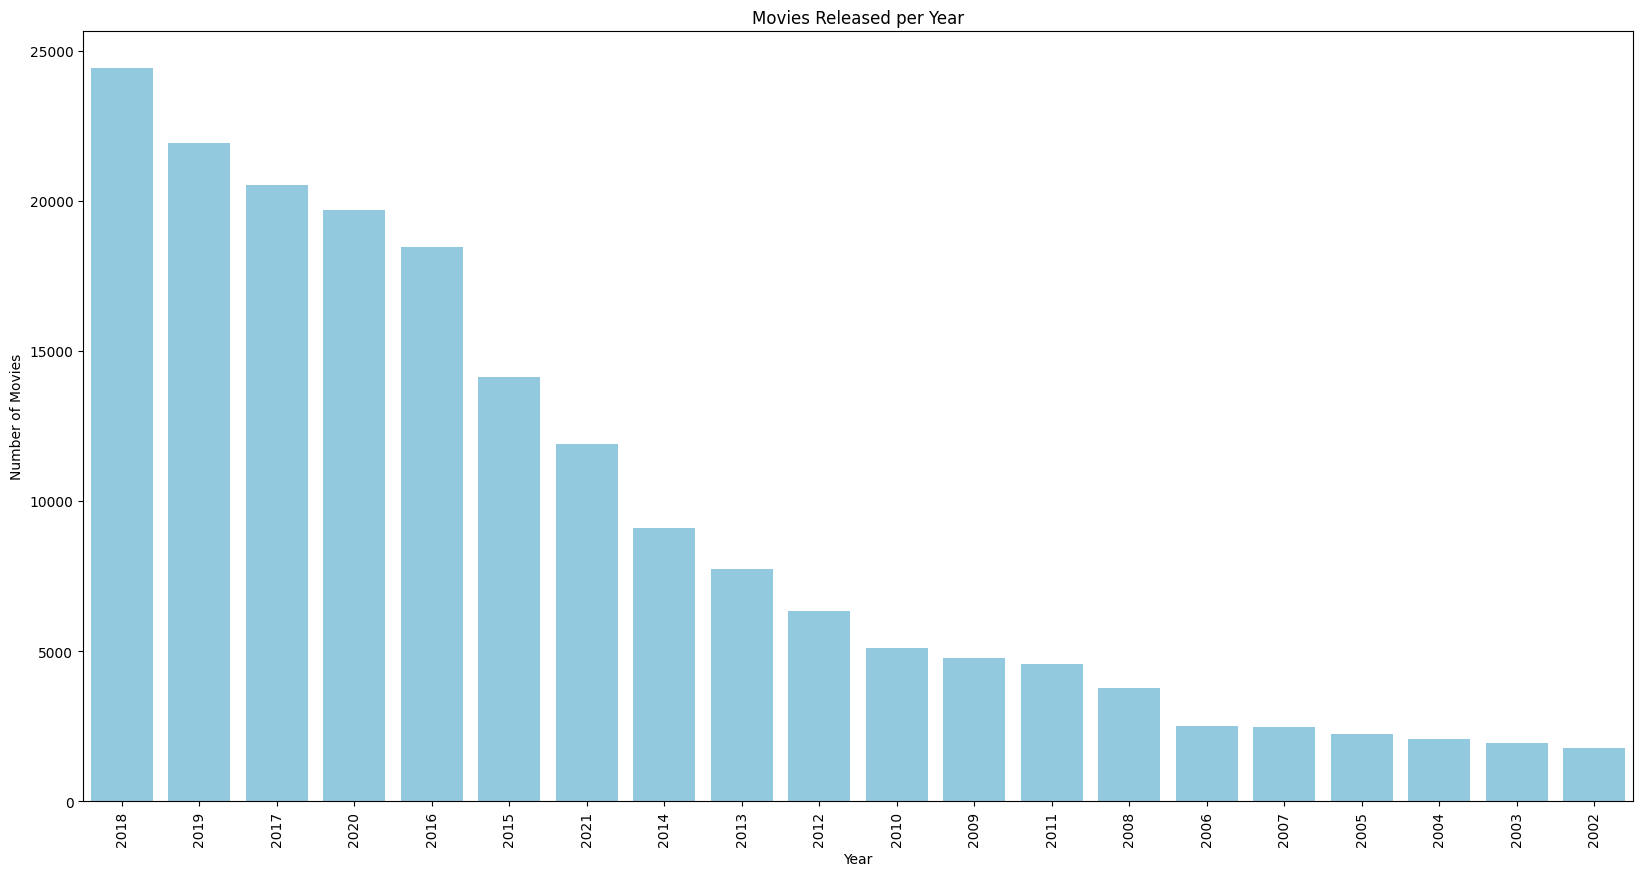

In [ ]:
x = df_final['release_year'].value_counts().index[:20]
y = df_final['release_year'].value_counts().values[:20]

plt.figure(figsize=(20, 10))
sns.countplot(data=df_final, x='release_year', color='skyblue', order=x)

plt.title("Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)


plt.show()

The number of movies released between 2015-2021 , number of movies released were comparatively higher indicates the bloom of online streaming platform.

#Comparison of tv shows vs. movies

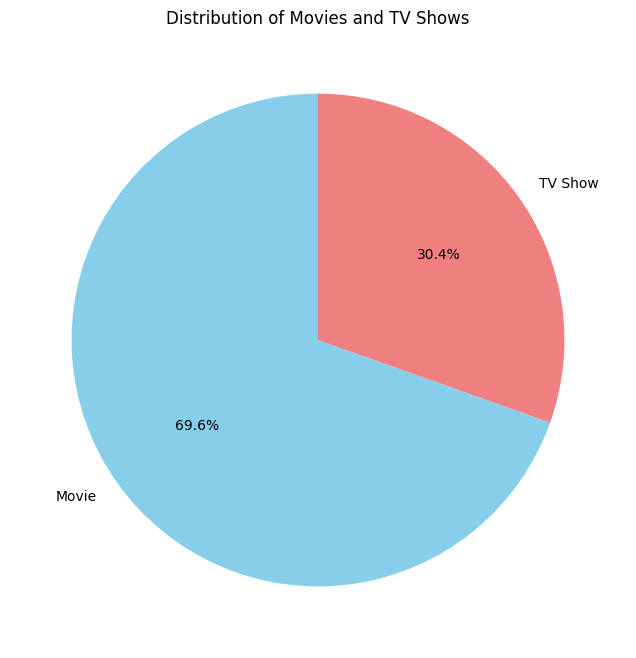

In [ ]:
x = df_final.groupby(['type']).agg({"title": "nunique"}).index
y = df_final.groupby(['type']).agg({"title": "nunique"}).values.flatten()

plt.figure(figsize=(8, 8))
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Movies and TV Shows")

plt.show()

From given data, it is almost 70:30 between movies and tv shows.

#What is the best time to launch a TV show?

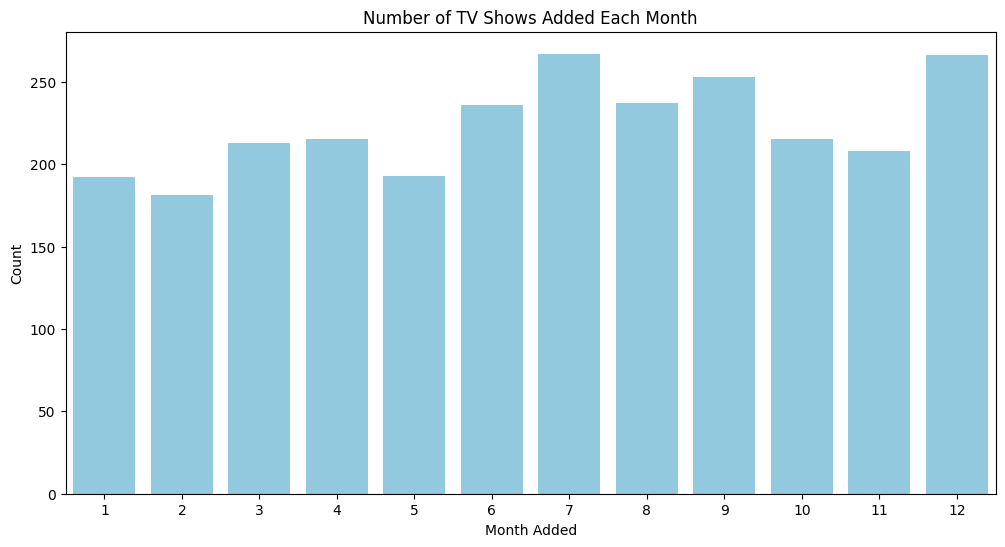

In [ ]:
tvshow = df_final[df_final['type'] == "TV Show"].groupby('month_added')['title'].nunique().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=tvshow, x='month_added', y='title', color='skyblue')
plt.title("Number of TV Shows Added Each Month")
plt.xlabel("Month Added")
plt.ylabel("Count")
plt.show()

If we look at month, relatively every month has over 150 new tv shows , but the summer season and christmas and newyear seasons has more new show.

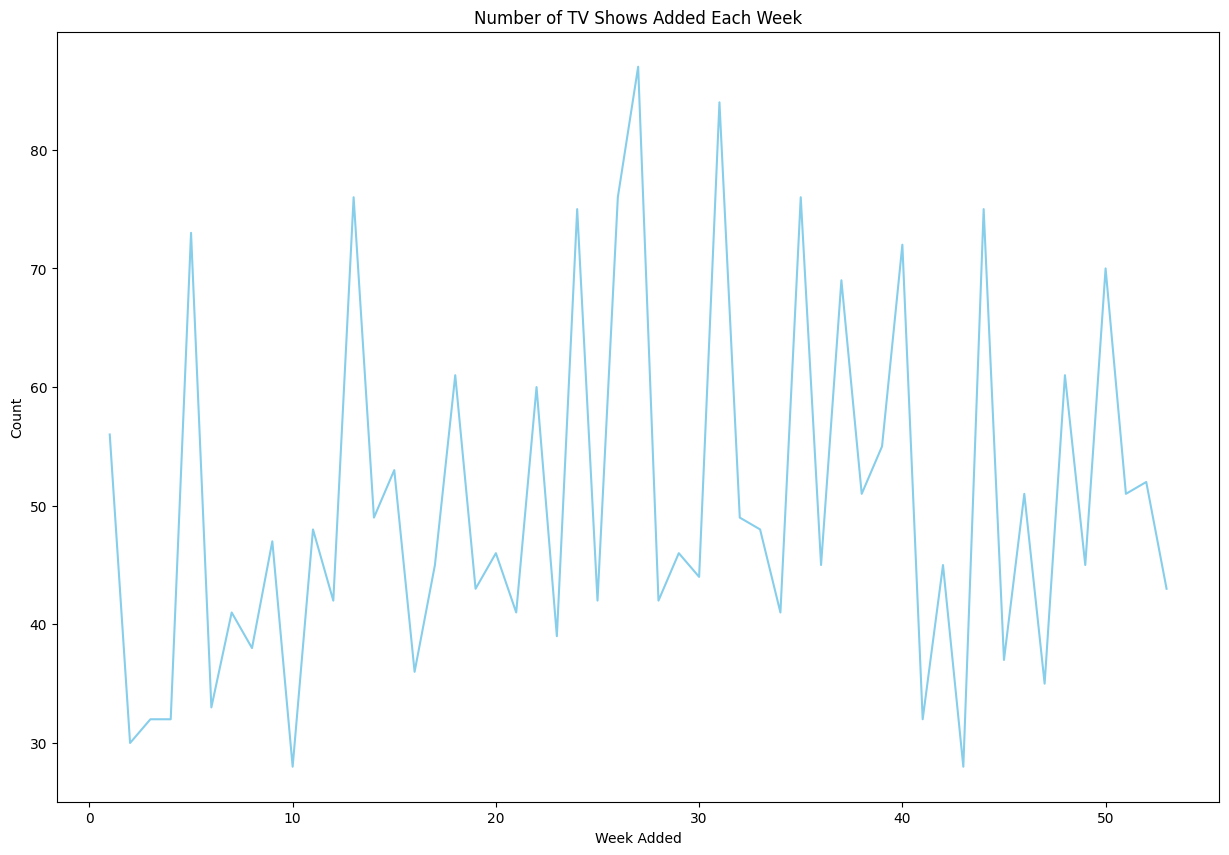

In [ ]:
tvshow = df_final[df_final['type'] == "TV Show"].groupby('week_added')['title'].nunique().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(data=tvshow, x='week_added', y='title', color='skyblue')
plt.title("Number of TV Shows Added Each Week")
plt.xlabel("Week Added")
plt.ylabel("Count")
plt.show()

samewise by week we can see that more number of shows were launched at mid 27 (late june)


#Analysis of actors/directors of different types of shows/movies.

In [ ]:
#removing unknown actors feild
filtered_df = df_final[df_final['Actors']!="nan"]
actor_counts = filtered_df.groupby('Actors')['title'].nunique().sort_values(ascending=False)[:25]

In [ ]:
actor_counts

Actors
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Vincent Tong         26
Rajesh Kava          26
Andrea Libman        25
Kareena Kapoor       25
Samuel L. Jackson    24
John Cleese          24
Fred Tatasciore      23
Tara Strong          23
Jigna Bhardwaj       23
Daisuke Ono          22
Ashleigh Ball        21
Ajay Devgn           21
Nicolas Cage         21
Name: title, dtype: int64

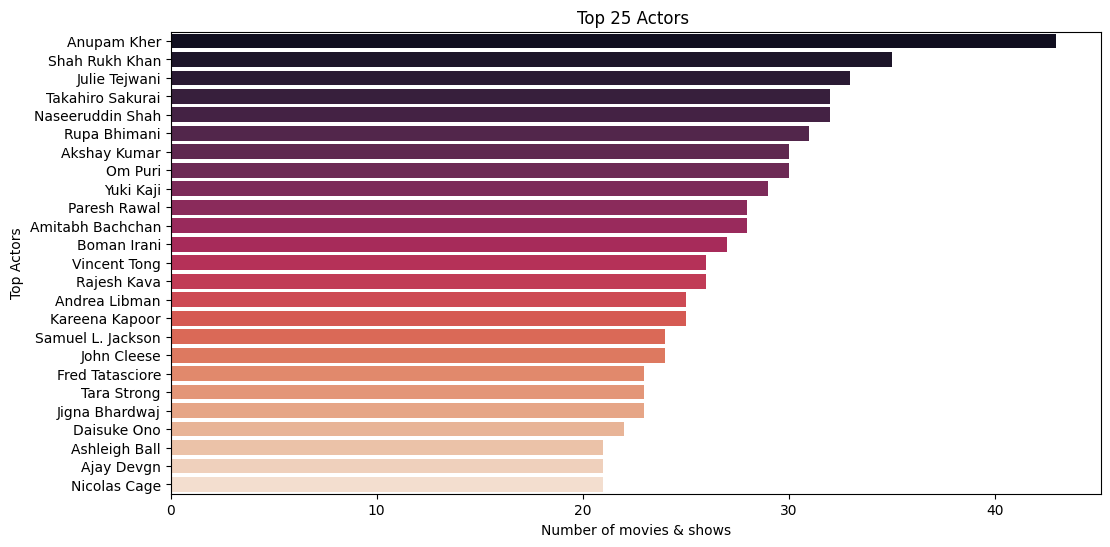

In [ ]:
x=filtered_df.groupby('Actors')['title'].nunique().sort_values(ascending=False)[:25]

plt.figure(figsize=(12, 6))
sns.barplot(x=x.values, y=x.index, palette="rocket",hue=x.index)
plt.title("Top 25 Actors ")
plt.xlabel("Number of movies & shows")
plt.ylabel("Top Actors")

plt.show()

From the list, Anupam Kher tops the list (acts in both movies and shows), followed by Bhasha SRK.

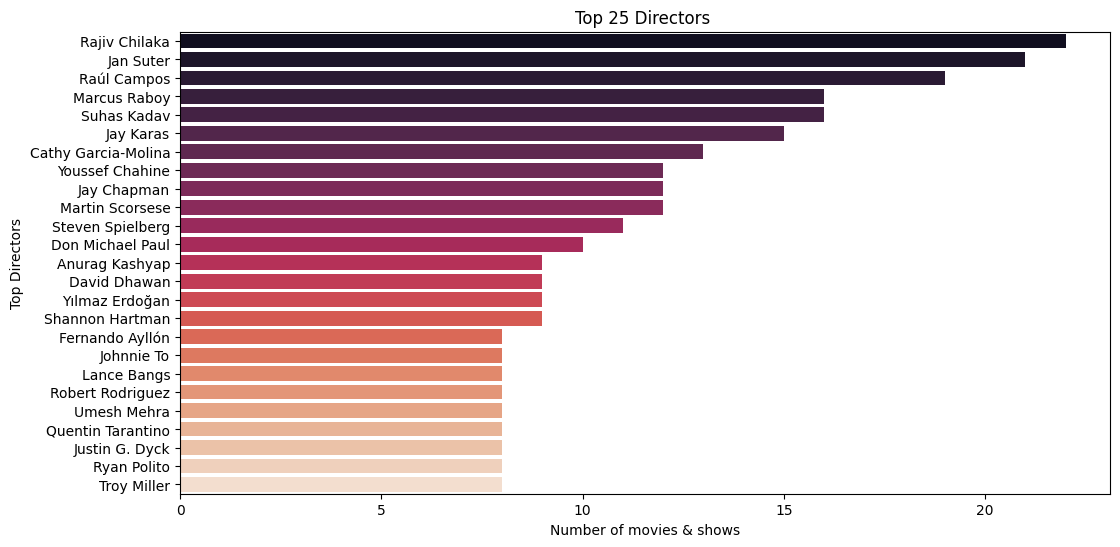

In [ ]:
#removing unknown directors feild
filtered_director= df_final[df_final['Directors']!="nan"]
director_counts = filtered_director.groupby('Directors')['title'].nunique().sort_values(ascending=False)[:25]


x=filtered_director.groupby('Directors')['title'].nunique().sort_values(ascending=False)[:25]

plt.figure(figsize=(12, 6))
sns.barplot(x=x.values, y=x.index, palette="rocket",hue=x.index)
plt.title("Top 25 Directors ")
plt.xlabel("Number of movies & shows")
plt.ylabel("Top Directors")

plt.show()

Rajiv Chilaka tops the directors list ( creator of famous Indian kids TV shows Chotta Bheem ) followed by Jan Sutter

#Does Netflix has more focus on TV Shows than movies in recent years

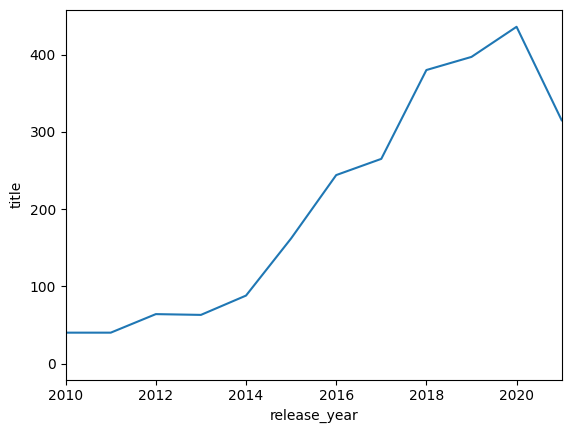

In [ ]:
tvshow_by_year = df_final[df_final['type'] == "TV Show"].groupby('release_year')['title'].nunique().reset_index()
sns.lineplot(data=tvshow_by_year,x='release_year',y='title')
plt.xlim(2010,2021)
plt.show()

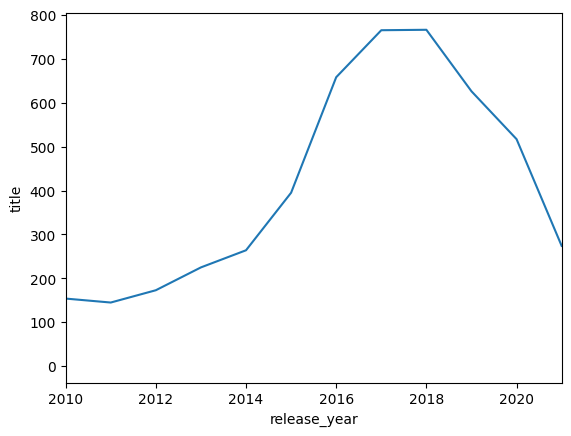

In [ ]:
movies_by_year = df_final[df_final['type'] == "Movie"].groupby('release_year')['title'].nunique().reset_index()
sns.lineplot(data=movies_by_year,x='release_year',y='title')
plt.xlim(2010,2021)
plt.show()

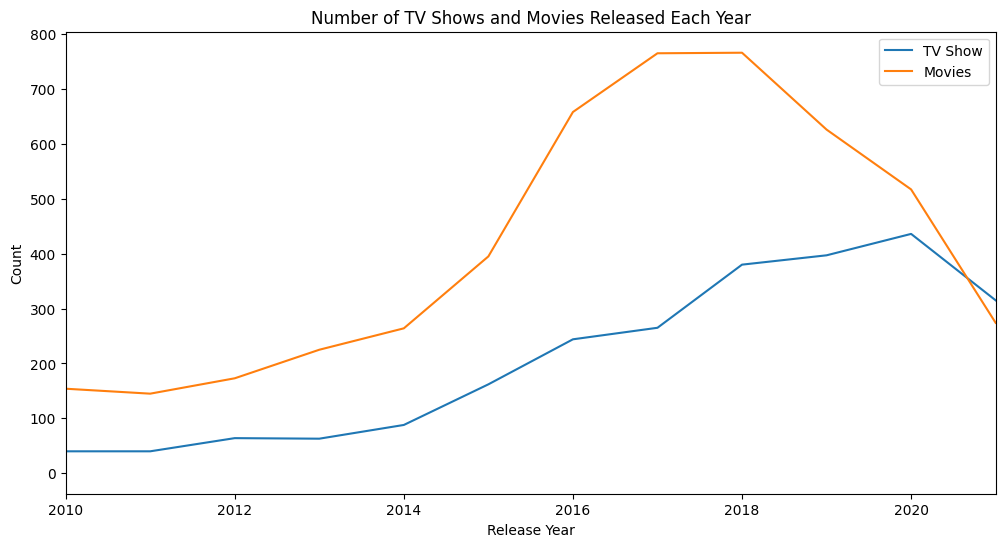

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=tvshow_by_year,x='release_year',y='title',label='TV Show')
sns.lineplot(data=movies_by_year,x='release_year',y='title',label='Movies')

plt.xlim(2010,2021)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of TV Shows and Movies Released Each Year')
plt.legend()
plt.show()

In recent years the number of tv shows released where significatly low then movies. But in year around 2018 and 2019 both Shows and Movies were released were high.

#Understanding what content is available in different countries

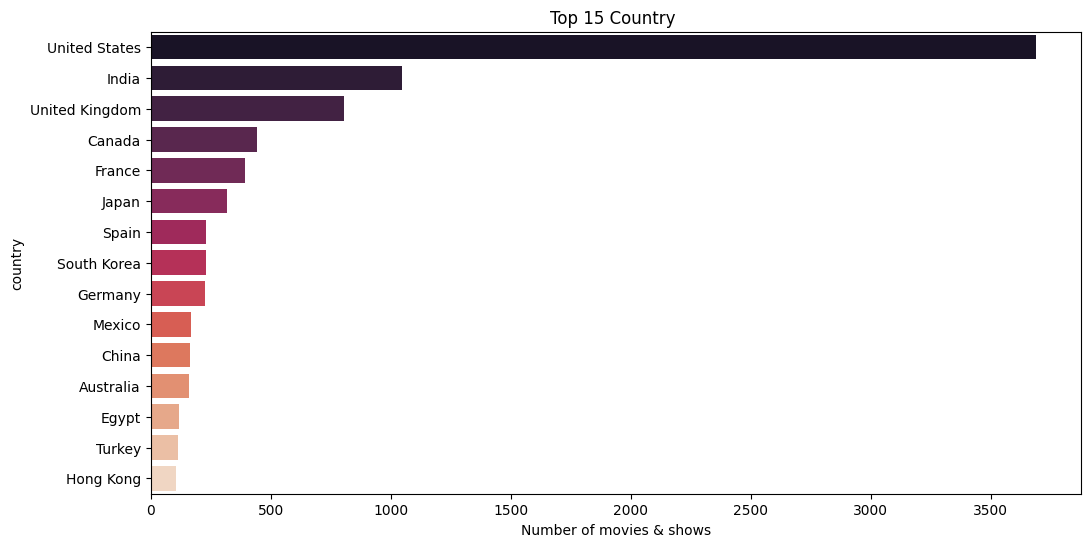

In [ ]:
filtered_country = df_final[(df_final['country']!="nan")]


x= filtered_country.groupby('country')['title'].nunique().sort_values(ascending=False)[:15]


plt.figure(figsize=(12, 6))
sns.barplot(x=x.values, y=x.index, palette="rocket",hue=x.index)
plt.title("Top 15 Country ")
plt.xlabel("Number of movies & shows")
plt.ylabel("country")

plt.show()

USA, India, UK are the top countries producing more contents to Netflix


In [ ]:
x

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Name: title, dtype: int64

#Exploring contents in INDIA

In [ ]:
india = df_final[(df_final['country']=="India")]
india.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,formatted_date,month_added,week_added,year_added
87,Kota Factory,nan,Mayur More,International TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
88,Kota Factory,nan,Mayur More,Romantic TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
89,Kota Factory,nan,Mayur More,TV Comedies,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
90,Kota Factory,nan,Jitendra Kumar,International TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
91,Kota Factory,nan,Jitendra Kumar,Romantic TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021


#Exploring What kind of contents has streaming in India.

In [ ]:
genre=india.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
genre

,Genre,title
13,International Movies,864
9,Dramas,662
4,Comedies,323
12,Independent Movies,167
0,Action & Adventure,137
19,Romantic Movies,120
17,Music & Musicals,96
34,Thrillers,92
14,International TV Shows,66
11,Horror Movies,35


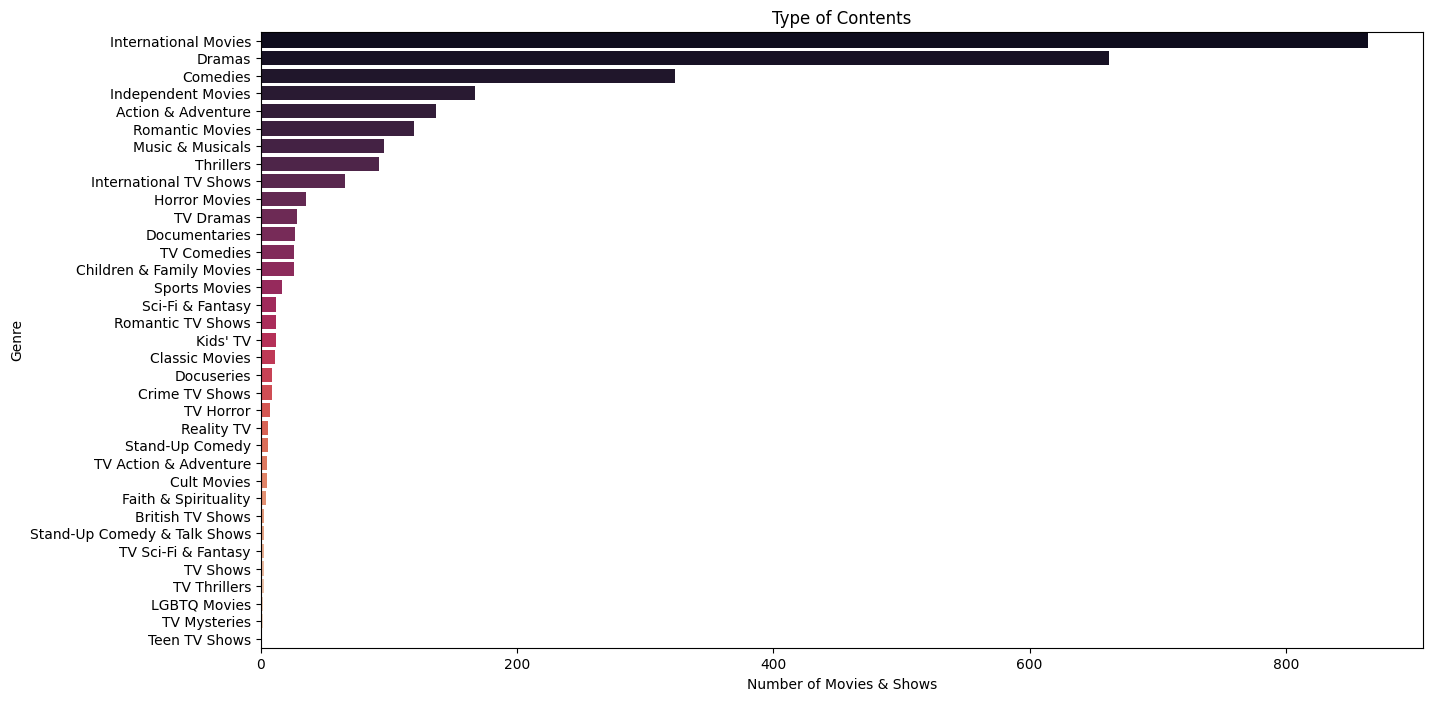

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=genre, x='title', y='Genre', palette='rocket',hue='Genre')
plt.title("Type of Contents")
plt.xlabel("Number of Movies & Shows")
plt.ylabel("Genre")
plt.show()

In India we have different kind of auidience, we have international movies, dramas, independent, action and romantic shows and movies.

#Analysing for what kind of auidence the contents are available in India.

In [ ]:
rating=india.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
rating

,rating,title
4,TV-14,572
6,TV-MA,266
7,TV-PG,144
9,TV-Y7,17
2,PG-13,11
5,TV-G,10
0,NR,7
1,PG,7
8,TV-Y,6
3,R,5


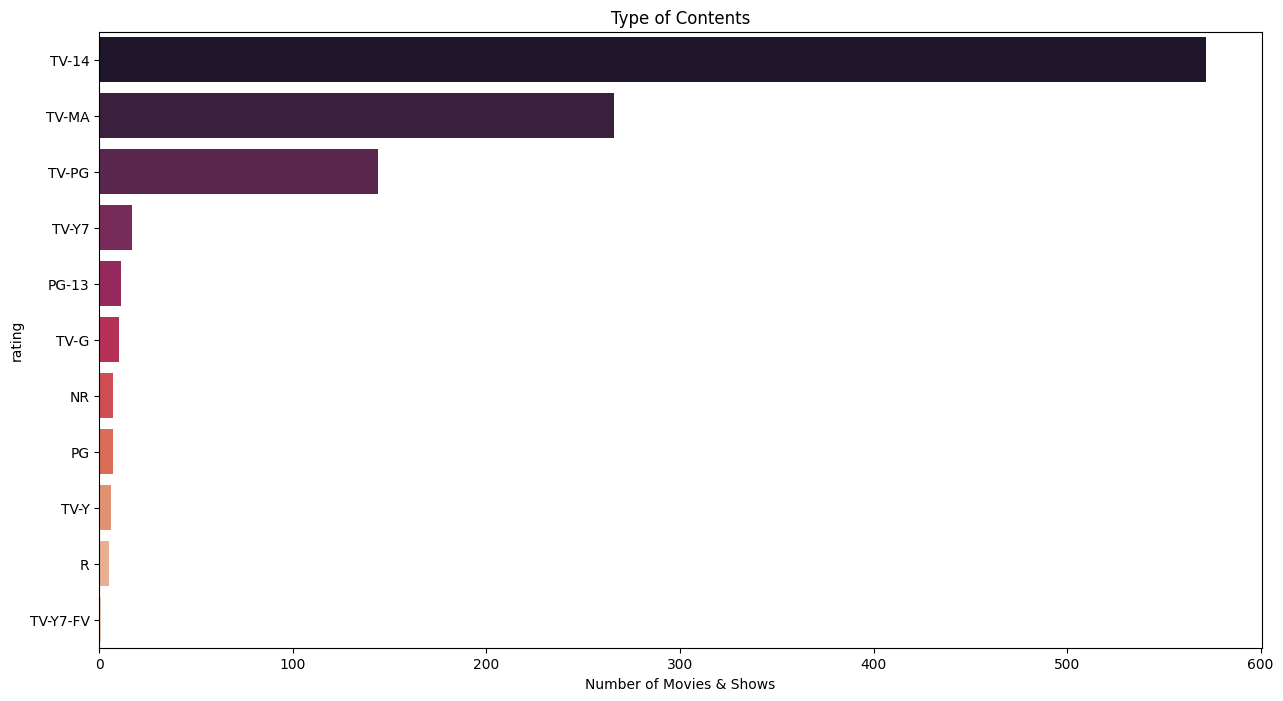

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=rating, x='title', y='rating', palette='rocket',hue='rating')
plt.title("Type of Contents")
plt.xlabel("Number of Movies & Shows")
plt.ylabel("rating")
plt.show()

In India , the more number of contents are available for audience above age 14 and there also high contents available for mature audience as well.

#Movies in India

In [ ]:
movies=india[india['type']=='Movie']
movies.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,formatted_date,month_added,week_added,year_added
641,Jeans,S. Shankar,Prashanth,Comedies,India,s25,Movie,2021-09-21,1998,TV-14,166,2021-09-21,9,38,2021
642,Jeans,S. Shankar,Prashanth,International Movies,India,s25,Movie,2021-09-21,1998,TV-14,166,2021-09-21,9,38,2021
643,Jeans,S. Shankar,Prashanth,Romantic Movies,India,s25,Movie,2021-09-21,1998,TV-14,166,2021-09-21,9,38,2021
644,Jeans,S. Shankar,Aishwarya Rai Bachchan,Comedies,India,s25,Movie,2021-09-21,1998,TV-14,166,2021-09-21,9,38,2021
645,Jeans,S. Shankar,Aishwarya Rai Bachchan,International Movies,India,s25,Movie,2021-09-21,1998,TV-14,166,2021-09-21,9,38,2021


In [ ]:
# removing unknown actor feilds in INDIA
movies_in_india = movies[(movies['Actors']!="nan")]

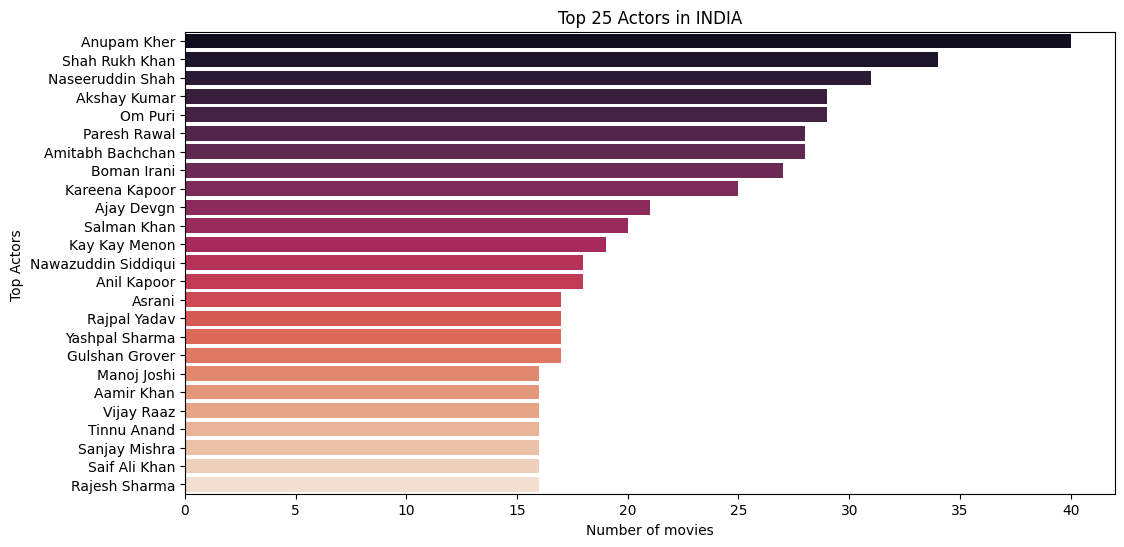

In [ ]:
x=movies_in_india.groupby('Actors')['title'].nunique().sort_values(ascending=False)[:25]

plt.figure(figsize=(12, 6))
sns.barplot(x=x.values, y=x.index, palette="rocket",hue=x.index)
plt.title("Top 25 Actors in INDIA")
plt.xlabel("Number of movies")
plt.ylabel("Top Actors ")

plt.show()

In [ ]:
x

Actors
Anupam Kher            40
Shah Rukh Khan         34
Naseeruddin Shah       31
Akshay Kumar           29
Om Puri                29
Paresh Rawal           28
Amitabh Bachchan       28
Boman Irani            27
Kareena Kapoor         25
Ajay Devgn             21
Salman Khan            20
Kay Kay Menon          19
Nawazuddin Siddiqui    18
Anil Kapoor            18
Asrani                 17
Rajpal Yadav           17
Yashpal Sharma         17
Gulshan Grover         17
Manoj Joshi            16
Aamir Khan             16
Vijay Raaz             16
Tinnu Anand            16
Sanjay Mishra          16
Saif Ali Khan          16
Rajesh Sharma          16
Name: title, dtype: int64

In India ,
Anupam Kher   -         40,
Shah Rukh Khan   -      34,
Naseeruddin Shah -      31,
Akshay Kumar     -      29, leads the list with more number of movies.

#Kind of movies present in India

In [ ]:
india_genre=movies.groupby(['Genre'])['title'].nunique().sort_values(ascending=False)
india_genre

Genre
International Movies        864
Dramas                      662
Comedies                    323
Independent Movies          167
Action & Adventure          137
Romantic Movies             120
Music & Musicals             96
Thrillers                    92
Horror Movies                35
Documentaries                27
Children & Family Movies     26
Sports Movies                17
Sci-Fi & Fantasy             12
Classic Movies               11
Stand-Up Comedy               6
Cult Movies                   5
Faith & Spirituality          4
LGBTQ Movies                  2
Name: title, dtype: int64

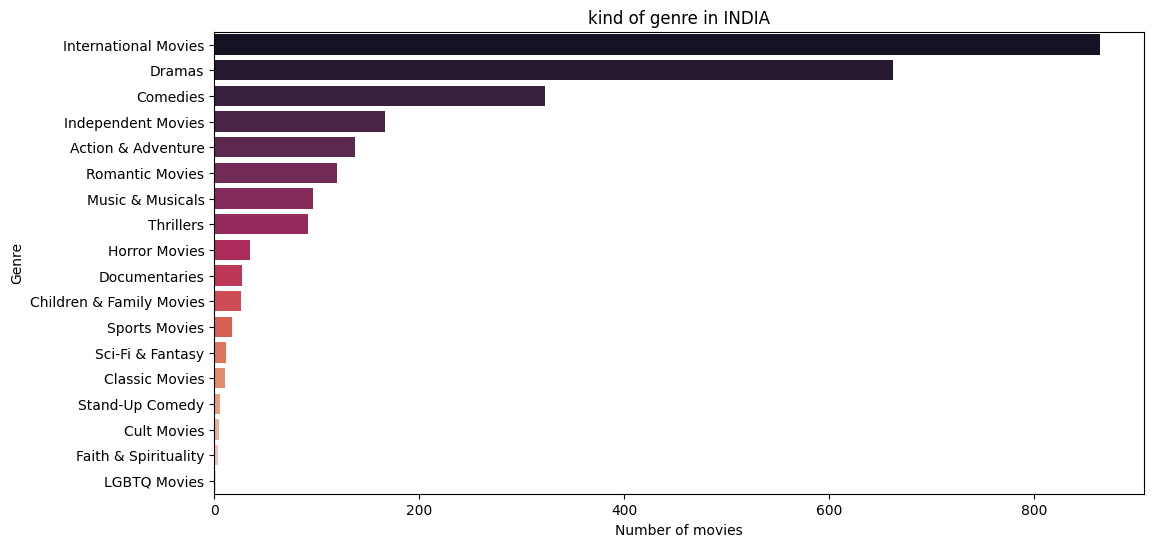

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=india_genre.values, y=india_genre.index, palette="rocket",hue=india_genre.index)
plt.title("kind of genre in INDIA")
plt.xlabel("Number of movies")
plt.ylabel("Genre")

plt.show()

In India the international movies have most number followed by dramas,comedies,independent and action adventure movies

#Audience in India

In [ ]:
india_rating=movies.groupby(['rating'])['title'].nunique().sort_values(ascending=False)
india_rating

rating
TV-14       547
TV-MA       232
TV-PG       133
TV-Y7        12
PG-13        11
NR            7
PG            7
TV-G          7
R             5
TV-Y7-FV      1
Name: title, dtype: int64

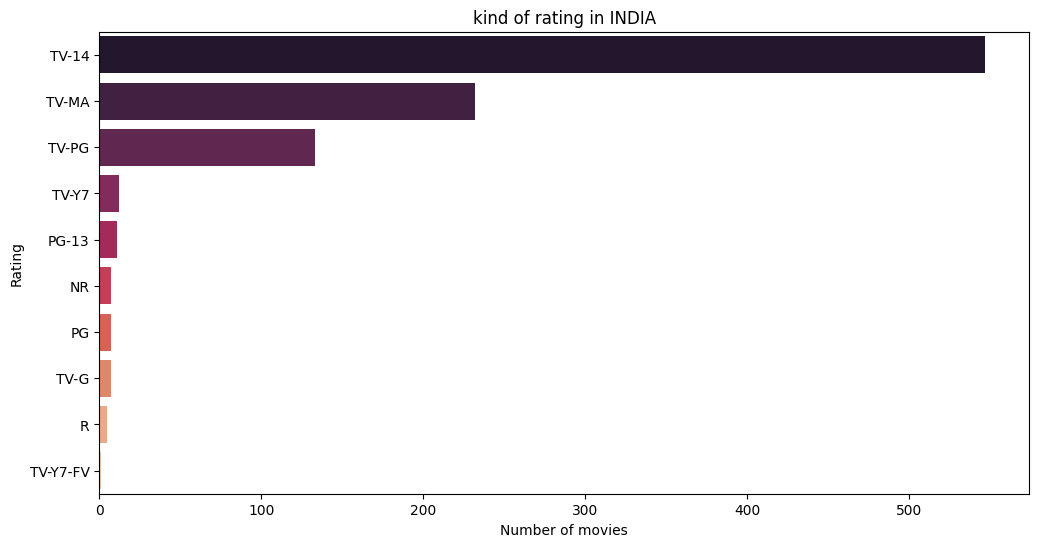

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=india_rating.values, y=india_rating.index, palette="rocket",hue=india_rating.index)
plt.title("kind of rating in INDIA")
plt.xlabel("Number of movies")
plt.ylabel("Rating")

plt.show()

We have more number of movies for age 14 and above.

#Duriation of movies

In [ ]:
movie_timing=movies.groupby(['duration'])['title'].nunique().sort_values(ascending=False).reset_index()
movie_timing

,duration,title
0,127,25
1,137,22
2,135,21
3,116,20
4,133,20
5,128,19
6,132,19
7,121,19
8,120,19
9,131,19


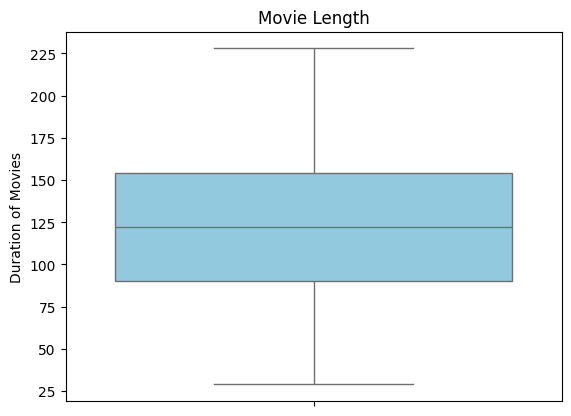

In [ ]:
sns.boxplot(data=movie_timing,y='duration',color='skyblue')
plt.title("Movie Length")

plt.ylabel("Duration of Movies")
plt.show()

The average timing of movies in india is idealy about 125 mins (two hours). The most number of movies will fall in the range around 90 - 154 mins.

In [ ]:
movie_timing.describe()

,duration,title
count,129.000000,129.000000
mean,122.162791,7.457364
std,42.919764,5.938497
min,29.000000,1.000000
25%,90.000000,2.000000
50%,122.000000,7.000000
75%,154.000000,11.000000
max,228.000000,25.000000


#time of release

In [ ]:
monthly_release=movies.groupby(['month_added'])['title'].nunique().sort_values(ascending=False).reset_index()
monthly_release.head(12)

,month_added,title
0,12,113
1,10,104
2,4,100
3,3,97
4,8,91
5,11,91
6,7,78
7,1,69
8,9,66
9,5,56


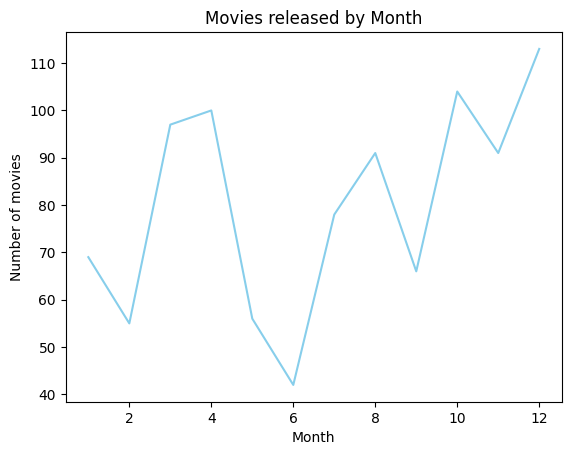

In [ ]:
sns.lineplot(data=monthly_release,x='month_added',y='title',color="skyblue")
plt.title("Movies released by Month")
plt.ylabel("Number of movies")
plt.xlabel("Month")
plt.show()

The March and Apirl has significantly increasing release because of summer vacation in  India and last 3 months of the year has comparatively more number of movie releases in India around festival seasons.

#comparing the movie releases over the year.

In [ ]:
yearly_release=movies.groupby(['year_added'])['title'].nunique().sort_values(ascending=False).reset_index()
yearly_release.head(12)

,year_added,title
0,2018,332
1,2019,200
2,2020,181
3,2017,148
4,2021,88
5,2016,13


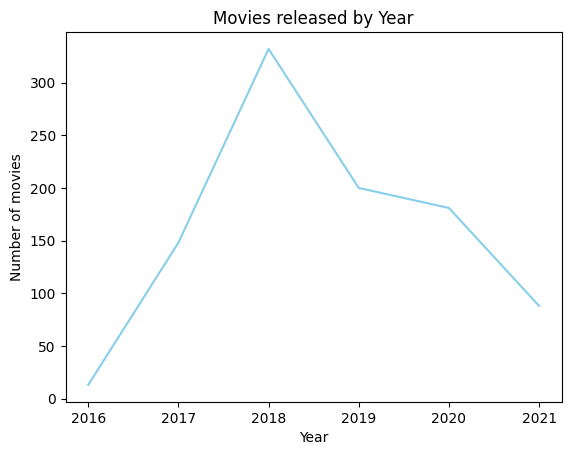

In [ ]:
sns.lineplot(data=yearly_release,x='year_added',y='title',color="skyblue")
plt.title("Movies released by Year")
plt.ylabel("Number of movies")
plt.xlabel("Year")
plt.show()

There is steady increase in movie release from year 2016 to 2018 where the movie release were in its peak indicating the bloom of online streaming platform in india.

#Top Directors in India

In [ ]:
# removing the unknown directors
director=movies[(movies['Directors']!="nan")]


directors=director.groupby(['Directors'])['title'].nunique().sort_values(ascending=False).reset_index()[:25]
directors

,Directors,title
0,David Dhawan,9
1,Anurag Kashyap,8
2,Umesh Mehra,8
3,Dibakar Banerjee,7
4,Ram Gopal Varma,7
5,Sooraj R. Barjatya,6
6,Imtiaz Ali,6
7,Karan Johar,6
8,Ashutosh Gowariker,6
9,Priyadarshan,6


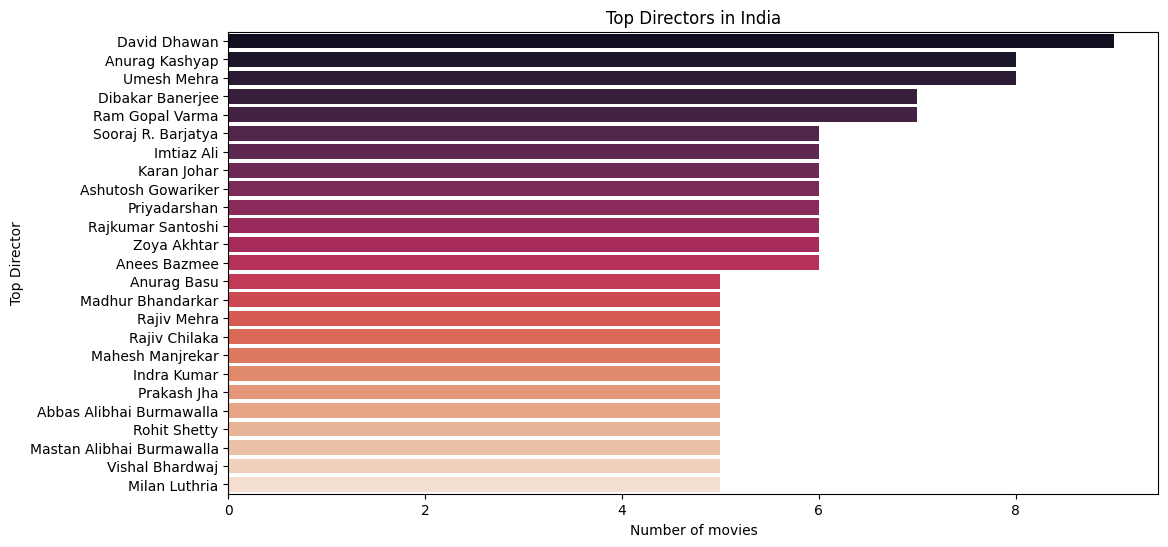

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=directors,x='title', y='Directors', palette="rocket",hue='Directors')
plt.title("Top Directors in India")
plt.xlabel("Number of movies")
plt.ylabel("Top Director")

plt.show()

David Dhawan, Anurag Kashyap and Umesh Mehra are the top directors in Netflix India.

#Top Actors and Directors combo in Netflix India

In [ ]:
actor_director=movies[(movies['Directors']!="nan")&(movies['Actors']!="nan")]


actor_director_movie=actor_director.groupby(['Directors','Actors'])['title'].nunique().sort_values(ascending=False).reset_index()[:10]
actor_director_movie.head(10)

,Directors,Actors,title
0,David Dhawan,Anupam Kher,6
1,Sooraj R. Barjatya,Alok Nath,5
2,Sooraj R. Barjatya,Salman Khan,5
3,David Dhawan,Salman Khan,4
4,Rajiv Chilaka,Julie Tejwani,4
5,Prakash Jha,Ajay Devgn,4
6,Priyadarshan,Rajpal Yadav,4
7,Umesh Mehra,Gulshan Grover,4
8,Rajiv Chilaka,Rajesh Kava,4
9,Sooraj R. Barjatya,Mohnish Bahl,4


In [ ]:
actor_director_movie['Director_Actor'] = actor_director_movie['Directors'] + ' - ' + actor_director_movie['Actors']
actor_director_movie.head(10)

,Directors,Actors,title,Director_Actor
0,David Dhawan,Anupam Kher,6,David Dhawan - Anupam Kher
1,Sooraj R. Barjatya,Alok Nath,5,Sooraj R. Barjatya - Alok Nath
2,Sooraj R. Barjatya,Salman Khan,5,Sooraj R. Barjatya - Salman Khan
3,David Dhawan,Salman Khan,4,David Dhawan - Salman Khan
4,Rajiv Chilaka,Julie Tejwani,4,Rajiv Chilaka - Julie Tejwani
5,Prakash Jha,Ajay Devgn,4,Prakash Jha - Ajay Devgn
6,Priyadarshan,Rajpal Yadav,4,Priyadarshan - Rajpal Yadav
7,Umesh Mehra,Gulshan Grover,4,Umesh Mehra - Gulshan Grover
8,Rajiv Chilaka,Rajesh Kava,4,Rajiv Chilaka - Rajesh Kava
9,Sooraj R. Barjatya,Mohnish Bahl,4,Sooraj R. Barjatya - Mohnish Bahl


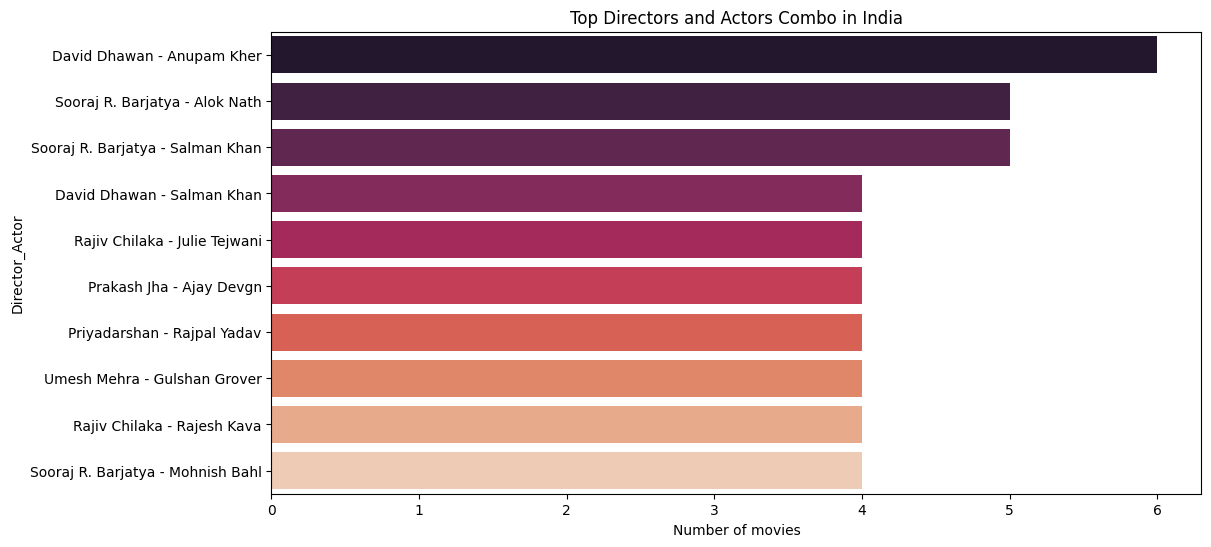

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=actor_director_movie,x='title', y='Director_Actor', palette="rocket",hue='Director_Actor')
plt.title("Top Directors and Actors Combo in India")
plt.xlabel("Number of movies")
plt.ylabel("Director_Actor")

plt.show()

David Dhawan - Anupam Kher,
Sooraj R. Barjatya -	Alok Nath,
Sooraj R. Barjatya	Salman Khan	 are the top actor director combo in Netflix Indian movies. From the list Sooraj liked to work with same cast for his movies.

#Analysing Indian TV Shows

In [ ]:
tvshow_india=india[india['type']=='TV Show']
tvshow_india.head(10)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,formatted_date,month_added,week_added,year_added
87,Kota Factory,nan,Mayur More,International TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
88,Kota Factory,nan,Mayur More,Romantic TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
89,Kota Factory,nan,Mayur More,TV Comedies,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
90,Kota Factory,nan,Jitendra Kumar,International TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
91,Kota Factory,nan,Jitendra Kumar,Romantic TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
92,Kota Factory,nan,Jitendra Kumar,TV Comedies,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
93,Kota Factory,nan,Ranjan Raj,International TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
94,Kota Factory,nan,Ranjan Raj,Romantic TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
95,Kota Factory,nan,Ranjan Raj,TV Comedies,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
96,Kota Factory,nan,Alam Khan,International TV Shows,India,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021


#TV Show over years

In [ ]:
tvshow_years=tvshow_india.groupby(['year_added'])['title'].nunique().sort_values(ascending=False).reset_index()
tvshow_years

,year_added,title
0,2019,18
1,2020,18
2,2018,17
3,2021,17
4,2017,14


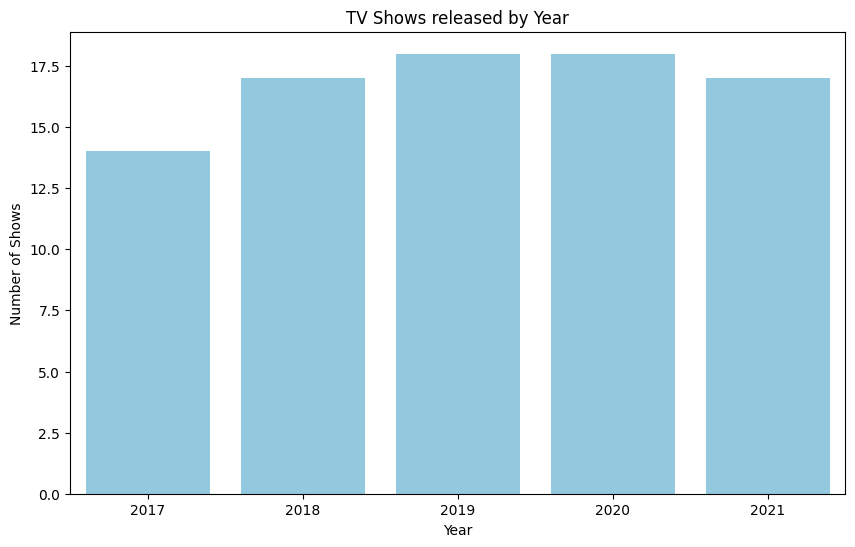

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tvshow_years,x='year_added',y='title',color="skyblue")
plt.title("TV Shows released by Year")
plt.ylabel("Number of Shows")
plt.xlabel("Year")
plt.show()

There has been constant number release in TV shows over the years 2017-2021.

#Monthly releases

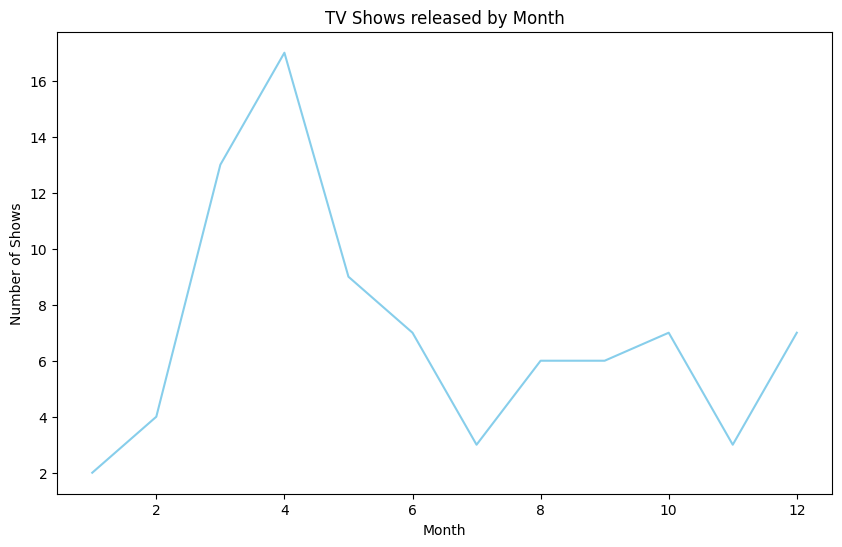

In [ ]:
tvshow_months=tvshow_india.groupby(['month_added'])['title'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=tvshow_months,x='month_added',y='title',color="skyblue")
plt.title("TV Shows released by Month")
plt.ylabel("Number of Shows")
plt.xlabel("Month")
plt.show()

Between Feb to March there is gradual increase in number of shows added, Indicates the summer holidays has the huge number of tv show releases.

#Types of tv show content available

In [ ]:
tvshow_content=tvshow_india.groupby(['Genre'])['title'].nunique().sort_values(ascending=False).reset_index()
tvshow_content

,Genre,title
0,International TV Shows,66
1,TV Dramas,28
2,TV Comedies,26
3,Kids' TV,12
4,Romantic TV Shows,12
5,Docuseries,9
6,Crime TV Shows,9
7,TV Horror,7
8,Reality TV,6
9,TV Action & Adventure,5


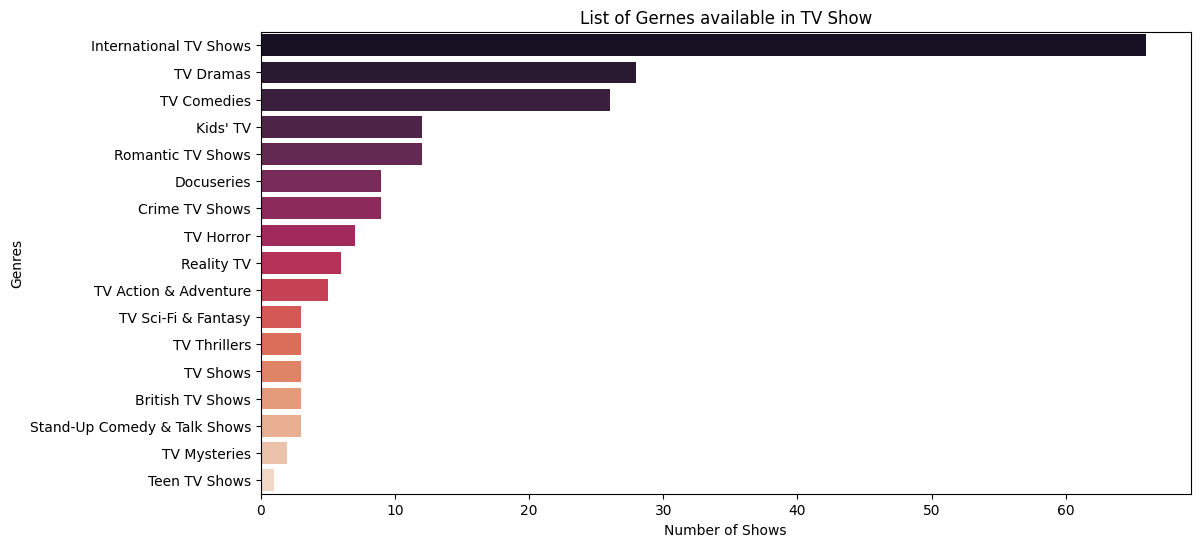

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tvshow_content,x='title', y='Genre', palette="rocket",hue='Genre')
plt.title("List of Gernes available in TV Show")
plt.xlabel("Number of Shows")
plt.ylabel("Genres")

plt.show()


In Netflix India, International TV shows leading the chart with comparatively followed by Indian TV dramas and comedies.

#Type of contents available for Indian audience

In [ ]:
tvshow_rating=tvshow_india.groupby(['rating'])['title'].nunique().sort_values(ascending=False).reset_index()
tvshow_rating

,rating,title
0,TV-MA,34
1,TV-14,25
2,TV-PG,11
3,TV-Y,6
4,TV-Y7,5
5,TV-G,3


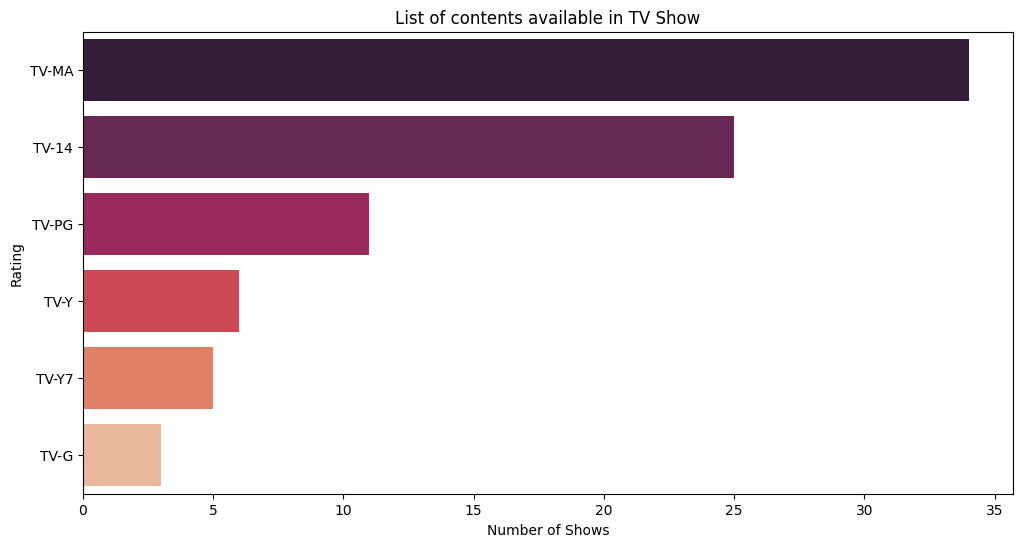

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tvshow_rating,x='title', y='rating', palette="rocket",hue='rating')
plt.title("List of contents available in TV Show")
plt.xlabel("Number of Shows")
plt.ylabel("Rating")

plt.show()

Netflix India focuses on more marture contents on the TV Show and relatively some feel good contents for the audience above age 14.

#Number of seasons available

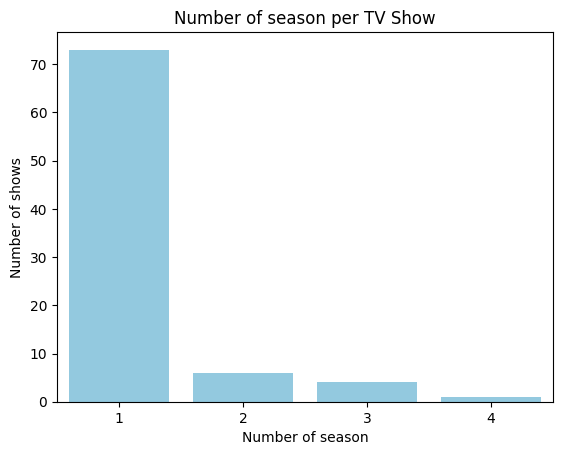

In [ ]:
tvshow_season=tvshow_india.groupby(['duration'])['title'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=tvshow_season,x='duration', y='title', color='skyblue')
plt.title("Number of season per TV Show")
plt.ylabel("Number of shows")
plt.xlabel("Number of season")

plt.show()

 Contents with only one season has most number of TV shows or series, which is great for binge watching.

#Top actors in TV Show

In [ ]:
# removing unknown actor feilds in INDIA
tvshow_india = tvshow_india[(tvshow_india['Actors']!="nan")]

tvshow_actor=tvshow_india.groupby('Actors')['title'].nunique().sort_values(ascending=False).reset_index()[:20]
tvshow_actor

,Actors,title
0,Nishka Raheja,3
1,Rajesh Kava,3
2,Reena Aggarwal,2
3,Mona Ambegaonkar,2
4,Jitendra Joshi,2
5,Shanoor Mirza,2
6,Gagan Arora,2
7,Sabina Malik,2
8,Aranya Kaur,2
9,Julie Tejwani,2


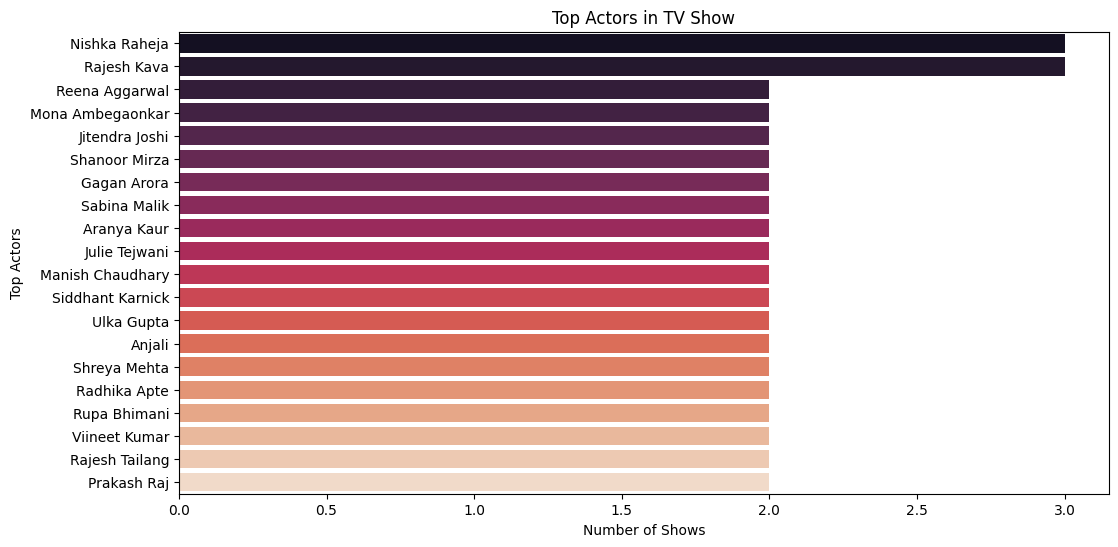

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tvshow_actor,x='title', y='Actors', palette="rocket",hue='Actors')
plt.title("Top Actors in TV Show")
plt.xlabel("Number of Shows")
plt.ylabel("Top Actors")

plt.show()

Nishka Raheja and Rajesh Kava has acted in 3 TV Shows that streamed in India. Most of the actors have acted in 2 tv shows.

#Top TV show director in Netflix India

In [ ]:
tvshow_india = tvshow_india[(tvshow_india['Directors']!="nan")]

tvshow_director=tvshow_india.groupby('Directors')['title'].nunique().sort_values(ascending=False).reset_index()[:20]
tvshow_director

,Directors,title
0,Gautham Vasudev Menon,2
1,Anurag Kashyap,1
2,Rathindran R Prasad,1
3,Vignesh Shivan,1
4,Vetri Maaran,1
5,Vasanth Sai,1
6,Tharun Bhascker Dhaassyam,1
7,Sudha Kongara,1
8,Soumendra Padhi,1
9,Sarjun,1


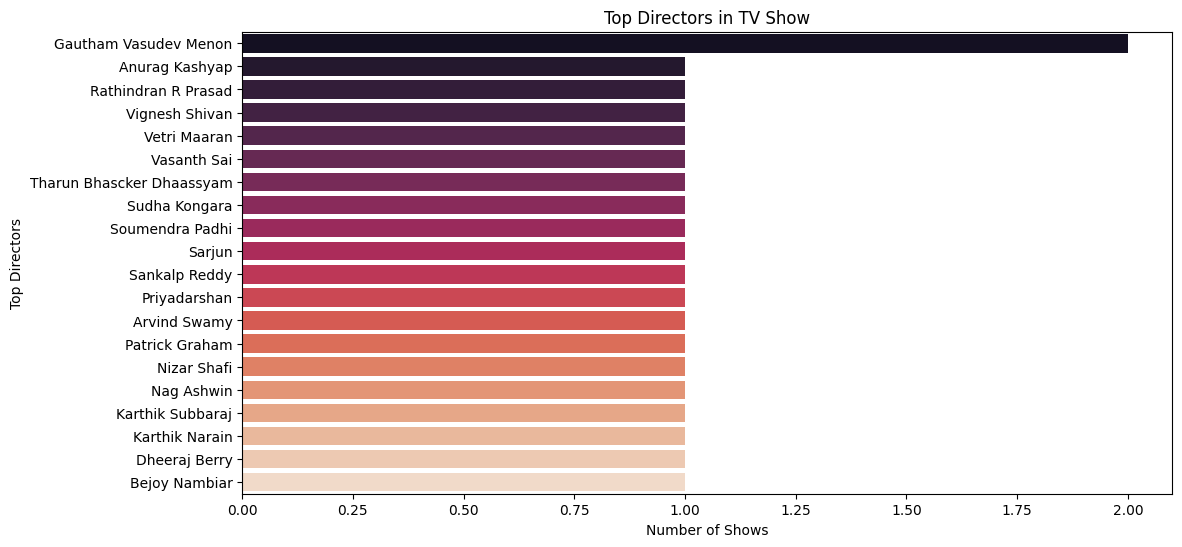

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tvshow_director,x='title', y='Directors', palette="rocket",hue='Directors')
plt.title("Top Directors in TV Show")
plt.xlabel("Number of Shows")
plt.ylabel("Top Directors")

plt.show()

Apart from Gautham Vasudev Menon who has directed 2 shows, most of the directors have directed only one show.

#Actor director combination in TV shows.

In [ ]:
actor_director=tvshow_india[(tvshow_india['Directors']!="nan")&(tvshow_india['Actors']!="nan")]


actor_director_tvshow=actor_director.groupby(['Directors','Actors'])['title'].nunique().sort_values(ascending=False).reset_index()[:10]
actor_director_tvshow

,Directors,Actors,title
0,Gautham Vasudev Menon,Prakash Raj,2
1,Gautham Vasudev Menon,Anjali,2
2,Gautham Vasudev Menon,Gautham Vasudev Menon,2
3,Sankalp Reddy,Saanve Megghana,1
4,Sankalp Reddy,Uko,1
5,Sankalp Reddy,Thanmayi,1
6,Sankalp Reddy,Srinivas Avasarala,1
7,Sankalp Reddy,Shruthi Haasan,1
8,Sankalp Reddy,Satya Dev,1
9,Sankalp Reddy,Sanjith Hegde,1


In [ ]:
actor_director_tvshow['Director_Actor'] = actor_director_tvshow['Directors'] + ' - ' + actor_director_tvshow['Actors']
actor_director_tvshow.head(10)

,Directors,Actors,title,Director_Actor
0,Gautham Vasudev Menon,Prakash Raj,2,Gautham Vasudev Menon - Prakash Raj
1,Gautham Vasudev Menon,Anjali,2,Gautham Vasudev Menon - Anjali
2,Gautham Vasudev Menon,Gautham Vasudev Menon,2,Gautham Vasudev Menon - Gautham Vasudev Menon
3,Sankalp Reddy,Saanve Megghana,1,Sankalp Reddy - Saanve Megghana
4,Sankalp Reddy,Uko,1,Sankalp Reddy - Uko
5,Sankalp Reddy,Thanmayi,1,Sankalp Reddy - Thanmayi
6,Sankalp Reddy,Srinivas Avasarala,1,Sankalp Reddy - Srinivas Avasarala
7,Sankalp Reddy,Shruthi Haasan,1,Sankalp Reddy - Shruthi Haasan
8,Sankalp Reddy,Satya Dev,1,Sankalp Reddy - Satya Dev
9,Sankalp Reddy,Sanjith Hegde,1,Sankalp Reddy - Sanjith Hegde


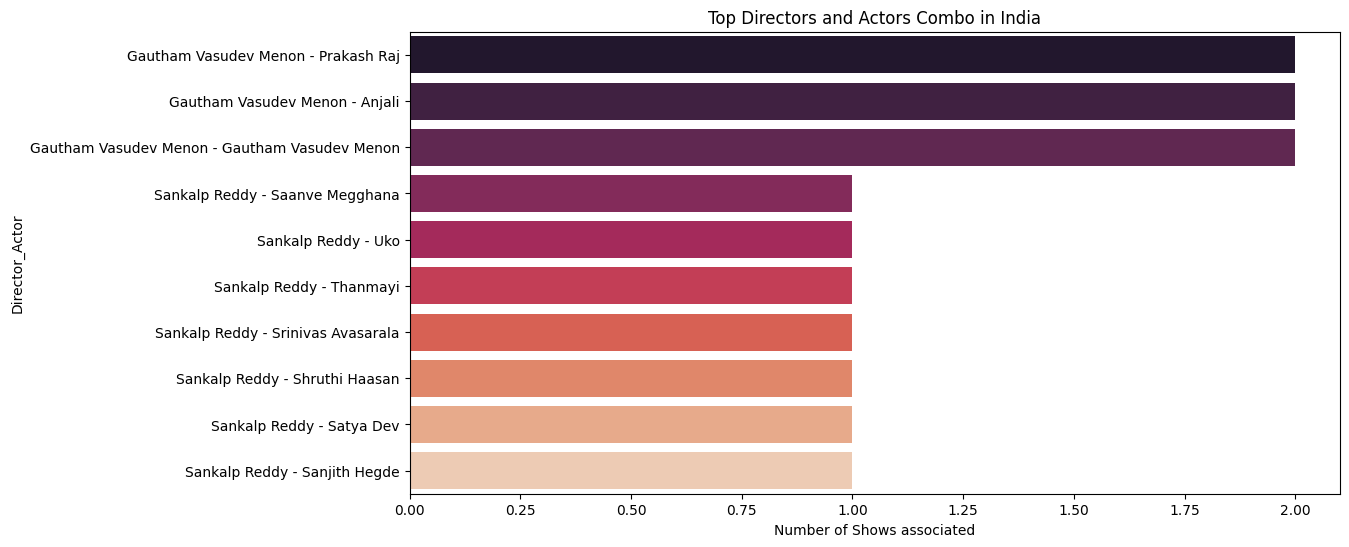

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=actor_director_tvshow,x='title', y='Director_Actor', palette="rocket",hue='Director_Actor')
plt.title("Top Directors and Actors Combo in India")
plt.xlabel("Number of Shows associated")
plt.ylabel("Director_Actor")

plt.show()

Looks Gautham has directed and acted in his own tv show and also associated with PrakashRaj and Anjali twice. Sankalp Reddy has associated with most number of acters for his one tv show.

#Comparing the release TV shows and Movies in NetflixIndia

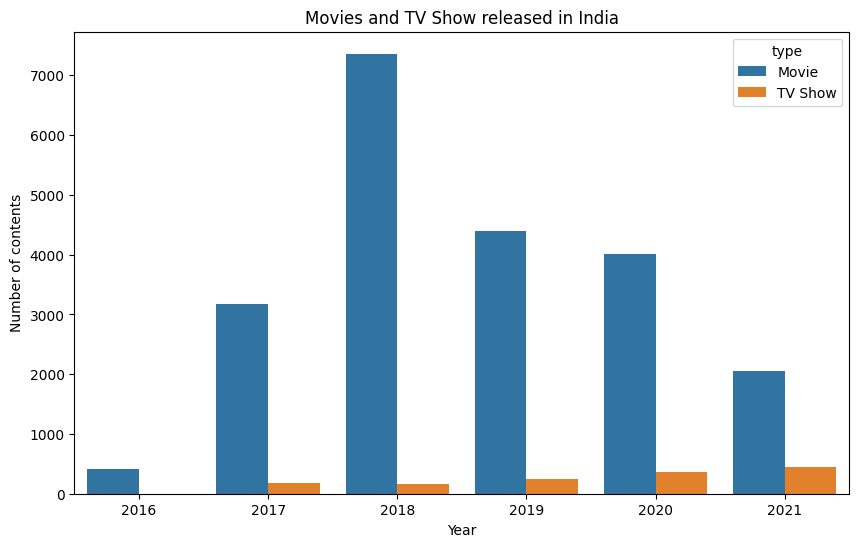

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data = india, x = 'year_added', hue='type')
plt.title("Movies and TV Show released in India")
plt.ylabel("Number of contents")
plt.xlabel("Year")
plt.show()

More number of movies has been added to Netflix India than TV show but over the years we can see that movies released getting decreased gradually and TV shows getting increased not sigificantly but gradually.

#Analysing Overall Contents across the country.

In [ ]:
df_final.head(10)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,formatted_date,month_added,week_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,2021-09-25,9,38,2021
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
5,Blood & Water,nan,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
6,Blood & Water,nan,Khosi Ngema,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
7,Blood & Water,nan,Gail Mabalane,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
8,Blood & Water,nan,Gail Mabalane,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021
9,Blood & Water,nan,Gail Mabalane,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09-24,9,38,2021


In [ ]:
#removing unknown country
df_final=df_final[df_final['country']!="nan"]

#movies all over the country
movies=df_final[df_final['type']=="Movie"]
top_5_country_movies=movies.groupby(['country'])['title'].nunique().sort_values(ascending=False).reset_index()[:10]
top_5_country_movies

,country,title
0,United States,2752
1,India,962
2,United Kingdom,534
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


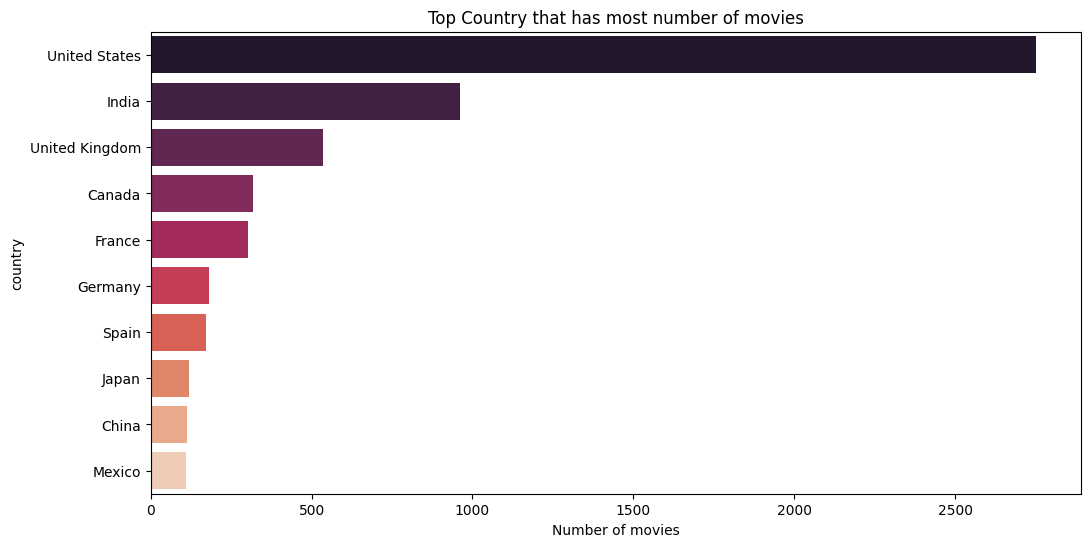

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_country_movies,x='title', y='country', palette="rocket",hue='country')
plt.title("Top Country that has most number of movies")
plt.xlabel("Number of movies")
plt.ylabel("country")

plt.show()

United States has produced most number of movies in Netflix almost over 2750 movies followed by India and United Kingdom.

#TV Shows across the country

In [ ]:
#tvshows all over the country
shows=df_final[df_final['type']=="TV Show"]
top_5_country_shows=shows.groupby(['country'])['title'].nunique().sort_values(ascending=False).reset_index()[:10]
top_5_country_shows

,country,title
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,66
9,Spain,61


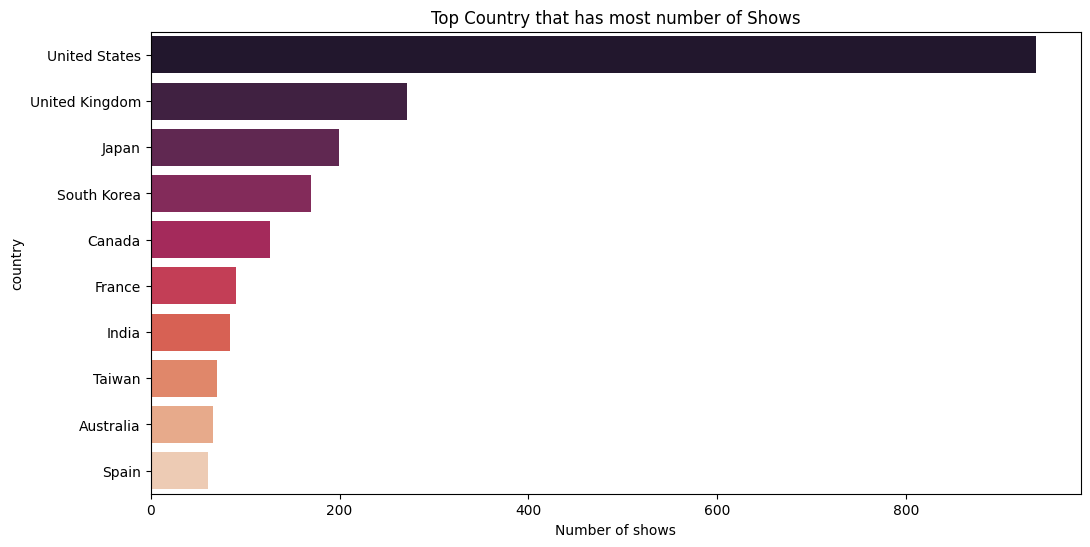

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_country_shows,x='title', y='country', palette="rocket",hue='country')
plt.title("Top Country that has most number of Shows")
plt.xlabel("Number of shows")
plt.ylabel("country")

plt.show()

Again in producing TV shows United States has more number of shows. United States is content hub for the netflix.

Top 5 countries in producing contents.

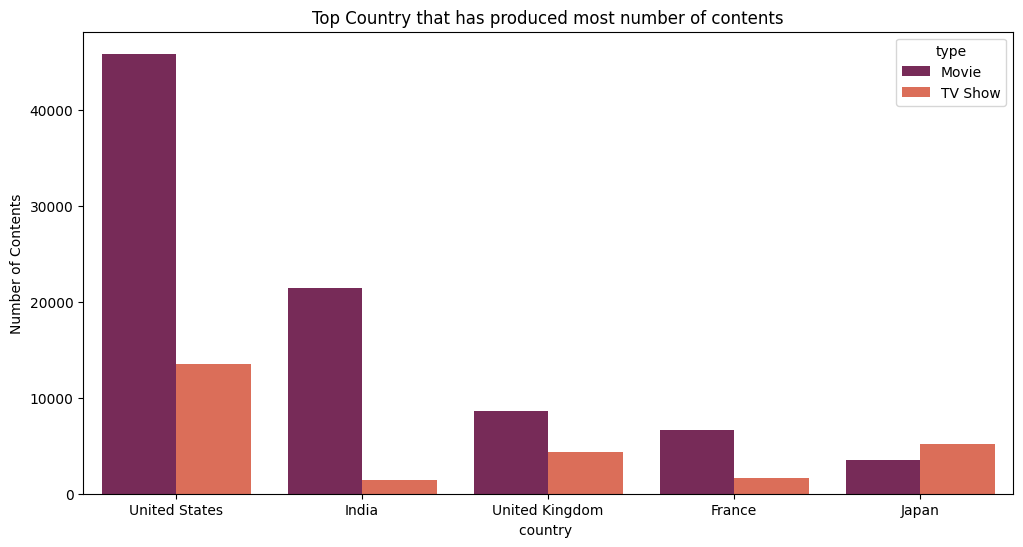

In [ ]:
top_country= df_final['country'].value_counts().index[:5]
top_5_country=df_final[df_final['country'].isin(top_country)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_5_country,x='country',hue='type',palette="rocket")
plt.title("Top Country that has produced most number of contents")
plt.xlabel("country ")
plt.ylabel("Number of Contents")

plt.show()


Form top 5 countries we can see that Movies are has most number of releases than TV Shows. In Japan we can see that TV shows are most likely released than movies.

# Top prefered contents across the country

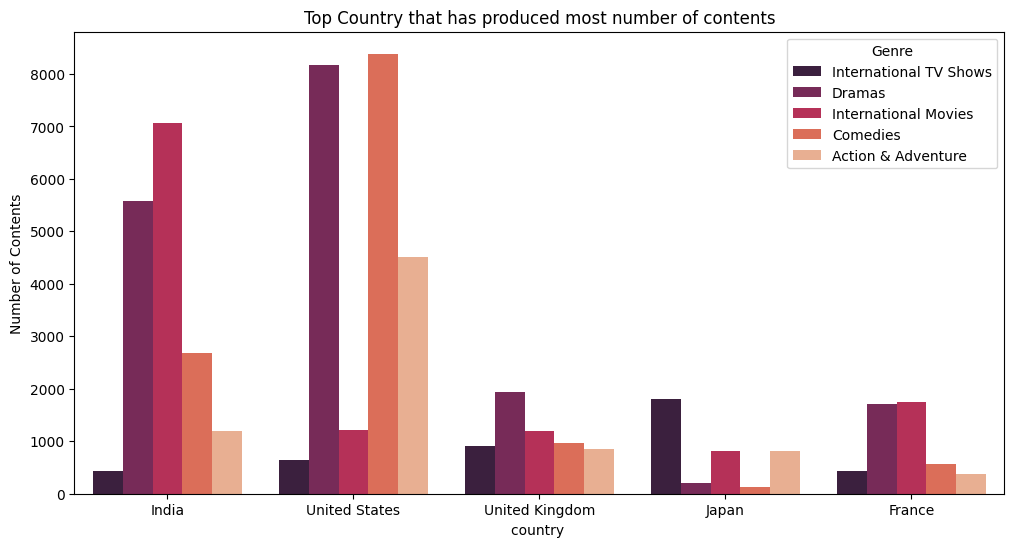

In [ ]:
top_genres= df_final['Genre'].value_counts().index[:5]
top_country= df_final['country'].value_counts().index[:5]
top_5_contents=df_final.loc[df_final['Genre'].isin(top_genres) & df_final['country'].isin(top_country)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_5_contents,x='country',hue='Genre',palette="rocket")
plt.title("Top Country that has produced most number of contents")
plt.xlabel("country ")
plt.ylabel("Number of Contents")

plt.show()

There is a wide range content viewers across the countries.
India prefers watching more international movies.

*   India prefers watching more international movies.
*   United States prefers watching more dramas and Comedies.
*   United Kingdom loves Dramas.
*   Japan prefers more International TV Shows.
*   France loves to watch Dramas and international movies.







#Analyzing contents in USA as it tops the chart

In [ ]:
usa = df_final[(df_final['country']=="United States")]
usa.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,formatted_date,month_added,week_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,2021-09-25,9,38,2021
179,Sankofa,Haile Gerima,Kofi Ghanaba,Dramas,United States,s8,Movie,2021-09-24,1993,TV-MA,125,2021-09-24,9,38,2021
185,Sankofa,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,s8,Movie,2021-09-24,1993,TV-MA,125,2021-09-24,9,38,2021
191,Sankofa,Haile Gerima,Kofi Ghanaba,International Movies,United States,s8,Movie,2021-09-24,1993,TV-MA,125,2021-09-24,9,38,2021
197,Sankofa,Haile Gerima,Oyafunmike Ogunlano,Dramas,United States,s8,Movie,2021-09-24,1993,TV-MA,125,2021-09-24,9,38,2021


# number of contents released in USA over years

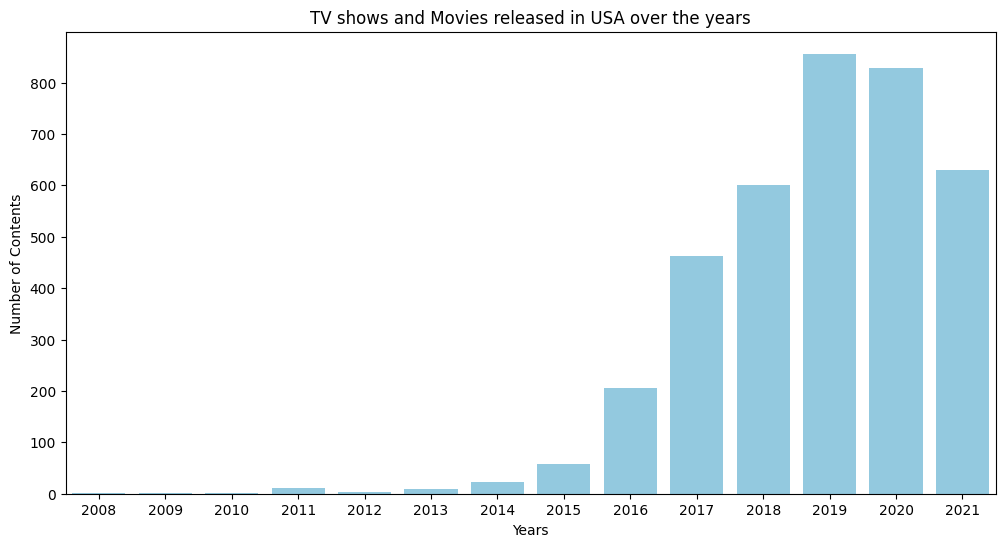

In [ ]:
usa_content=usa.groupby(['year_added'])['title'].nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=usa_content,x='year_added',y='title',color='Skyblue')
plt.title("TV shows and Movies released in USA over the years")
plt.xlabel("Years")
plt.ylabel("Number of Contents")

plt.show()

In USA , the contents started to lanch in Netflix begins fro 2008 but it has started to bloom at 2016 and has reached its peak during 2019.

#Top actors in USA

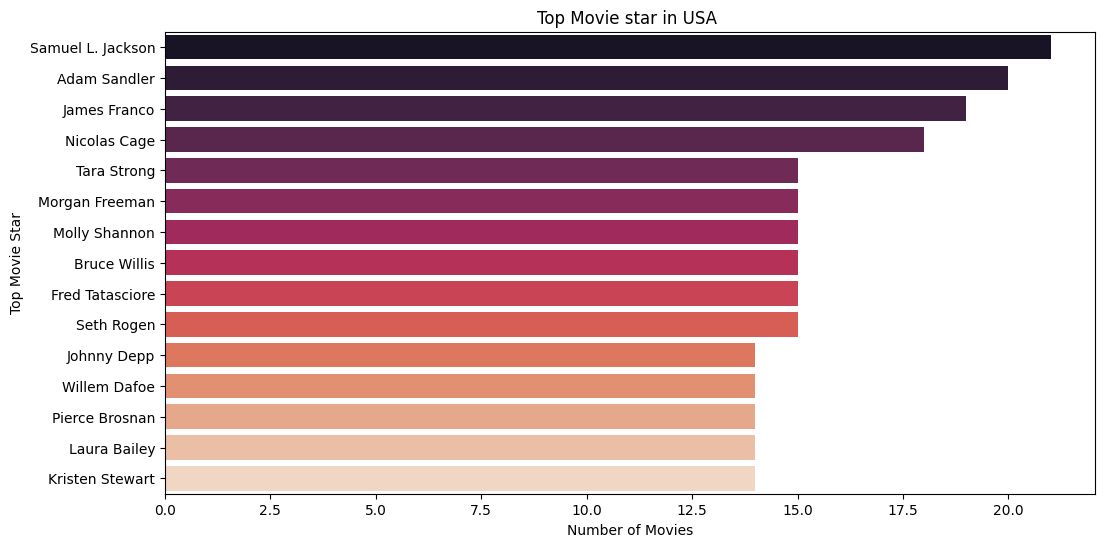

In [ ]:
usa = usa[usa['Actors'] != "nan"]
usa_movie=usa[usa['type'] == "Movie"]
usa_movie_actor = usa_movie.groupby(['Actors'])['title'].nunique().sort_values(ascending=False).reset_index()[:15]

plt.figure(figsize=(12, 6))
sns.barplot(data=usa_movie_actor,y='Actors',x='title',hue='Actors',palette="rocket")
plt.title("Top Movie star in USA ")
plt.ylabel("Top Movie Star")
plt.xlabel("Number of Movies")

plt.show()

Samuel L. Jackson, Adam Sandler, James Franco stars in most number movies in Netflix USA

#Top Movie Directors in USA

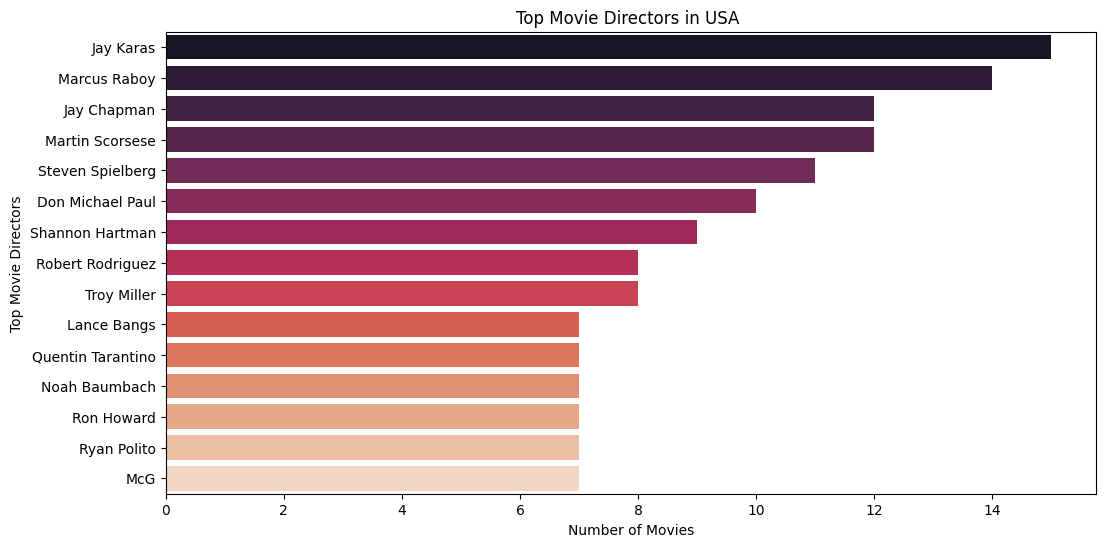

In [ ]:
usa = usa[usa['Directors'] != "nan"]
usa_movie=usa[usa['type'] == "Movie"]
usa_movie_director = usa_movie.groupby(['Directors'])['title'].nunique().sort_values(ascending=False).reset_index()[:15]

plt.figure(figsize=(12, 6))
sns.barplot(data=usa_movie_director,y='Directors',x='title',hue='Directors',palette="rocket")
plt.title("Top Movie Directors in USA ")
plt.ylabel("Top Movie Directors")
plt.xlabel("Number of Movies")

plt.show()

Jay Karas, Marcus Raboy and Jay Chapman tops the directors list in Netflix Movies.

#Top actors directors combination in USA

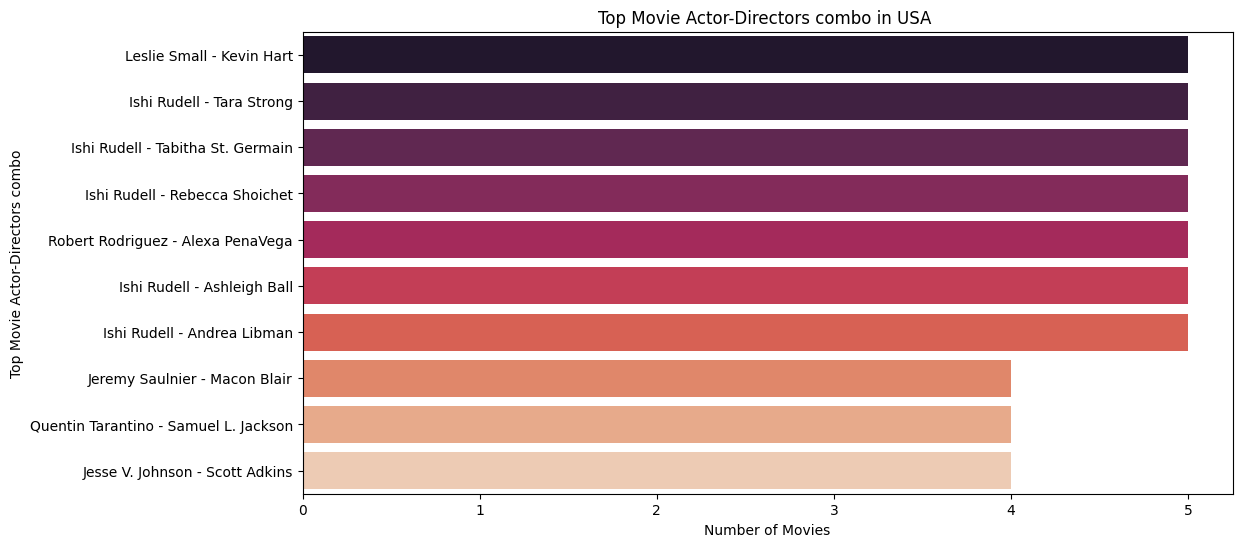

In [ ]:
usa_actor_director=usa_movie[(usa_movie['Directors']!="nan")&(usa_movie['Actors']!="nan")]


usa_actor_director_movie=usa_actor_director.groupby(['Directors','Actors'])['title'].nunique().sort_values(ascending=False).reset_index()[:10]
usa_actor_director_movie['Director_Actor'] = usa_actor_director_movie['Directors'] + ' - ' + usa_actor_director_movie['Actors']


plt.figure(figsize=(12, 6))
sns.barplot(data=usa_actor_director_movie,y='Director_Actor',x='title',hue='Director_Actor',palette="rocket")
plt.title("Top Movie Actor-Directors combo in USA ")
plt.ylabel("Top Movie Actor-Directors combo")
plt.xlabel("Number of Movies")

plt.show()

The Leslie Small and Kevin Hart has done 5 flims together in Netflix and from the list Ishi Rudell likes to collabrate with same actors.

#Kind of Movies watched in USA

In [ ]:
usa_movie_type=usa_movie.groupby(['Genre'])[('title')].nunique().sort_values(ascending=False).reset_index()
usa_movie_type.head(10)

,Genre,title
0,Dramas,827
1,Comedies,667
2,Action & Adventure,401
3,Independent Movies,389
4,Children & Family Movies,369
5,Thrillers,292
6,Documentaries,254
7,Romantic Movies,224
8,Stand-Up Comedy,209
9,Horror Movies,199


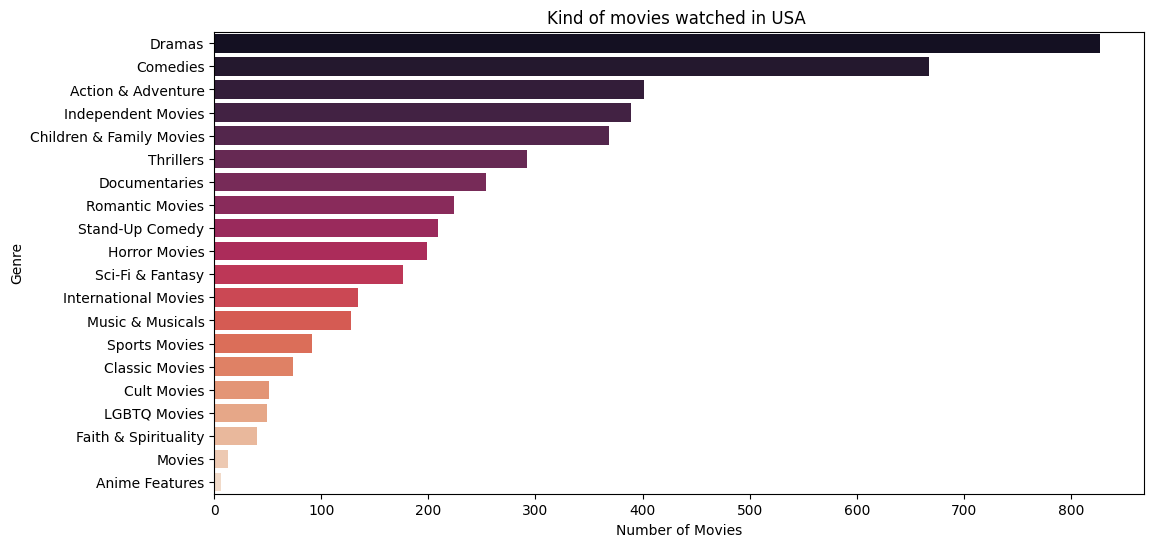

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=usa_movie_type,y='Genre',x='title',hue='Genre',palette="rocket")
plt.title("Kind of movies watched in USA ")
plt.ylabel("Genre")
plt.xlabel("Number of Movies")

plt.show()

Dramas, Comedies, Action, children and family, Thriller kind of movies are mostly present in USA netflix.

# TV Shows in USA

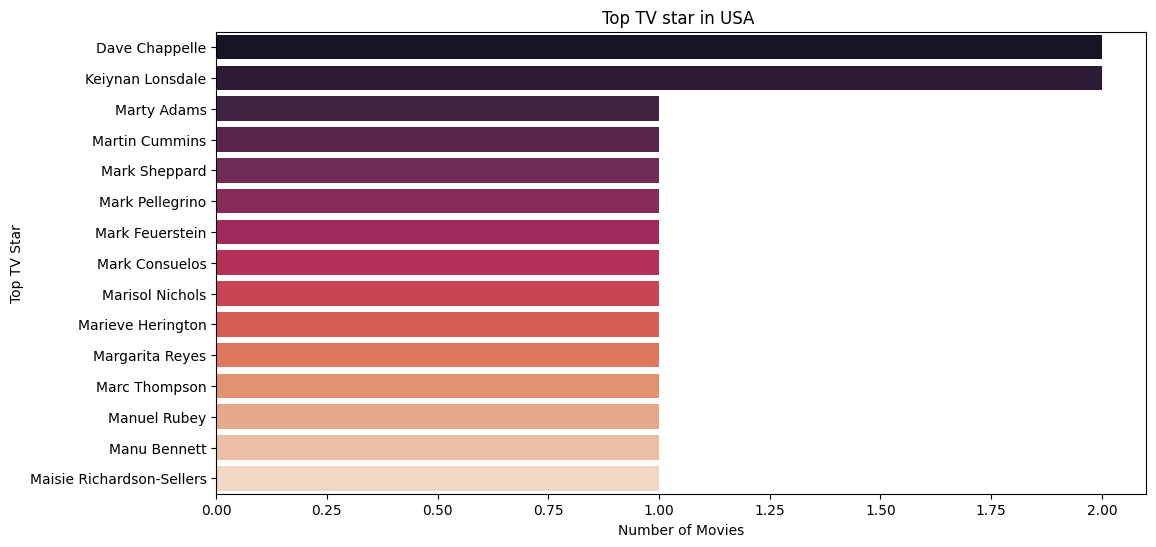

In [ ]:

usa_show=usa[usa['type'] == "TV Show"]
usa_show_actor = usa_show.groupby(['Actors'])['title'].nunique().sort_values(ascending=False).reset_index()[:15]

plt.figure(figsize=(12, 6))
sns.barplot(data=usa_show_actor,y='Actors',x='title',hue='Actors',palette="rocket")
plt.title("Top TV star in USA ")
plt.ylabel("Top TV Star")
plt.xlabel("Number of Movies")

plt.show()

Dave Chppelle, Keiynan Lonsdale have acted in 2 TV shows.

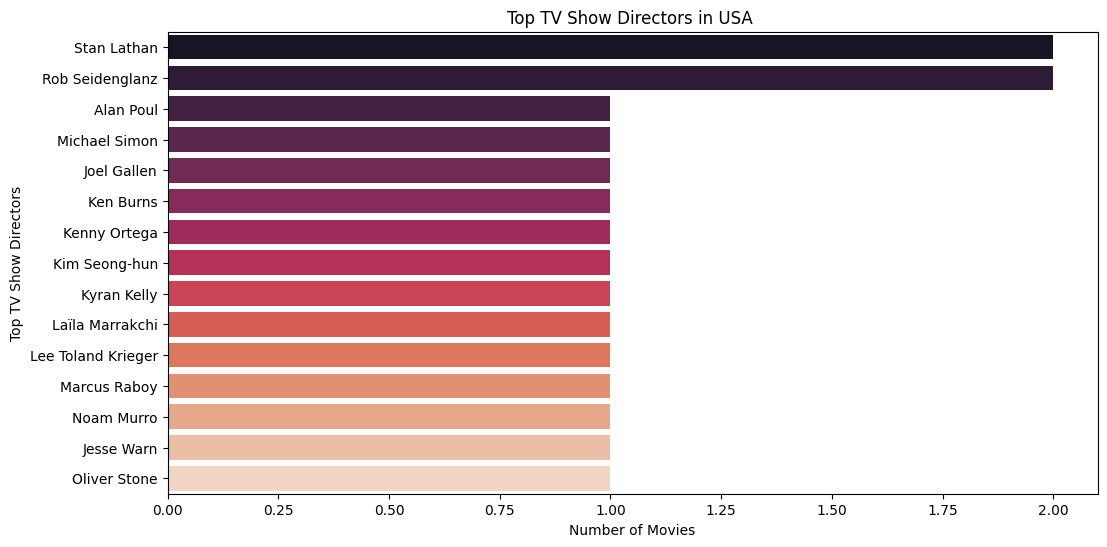

In [ ]:
usa = usa[usa['Directors'] != "nan"]
usa_show=usa[usa['type'] == "TV Show"]
usa_show_Directors = usa_show.groupby(['Directors'])['title'].nunique().sort_values(ascending=False).reset_index()[:15]

plt.figure(figsize=(12, 6))
sns.barplot(data=usa_show_Directors,y='Directors',x='title',hue='Directors',palette="rocket")
plt.title("Top TV Show Directors in USA ")
plt.ylabel("Top TV Show Directors")
plt.xlabel("Number of Movies")

plt.show()

Stan Latham and Rob Seidenglanz has directed two tv shows in USA netflix.

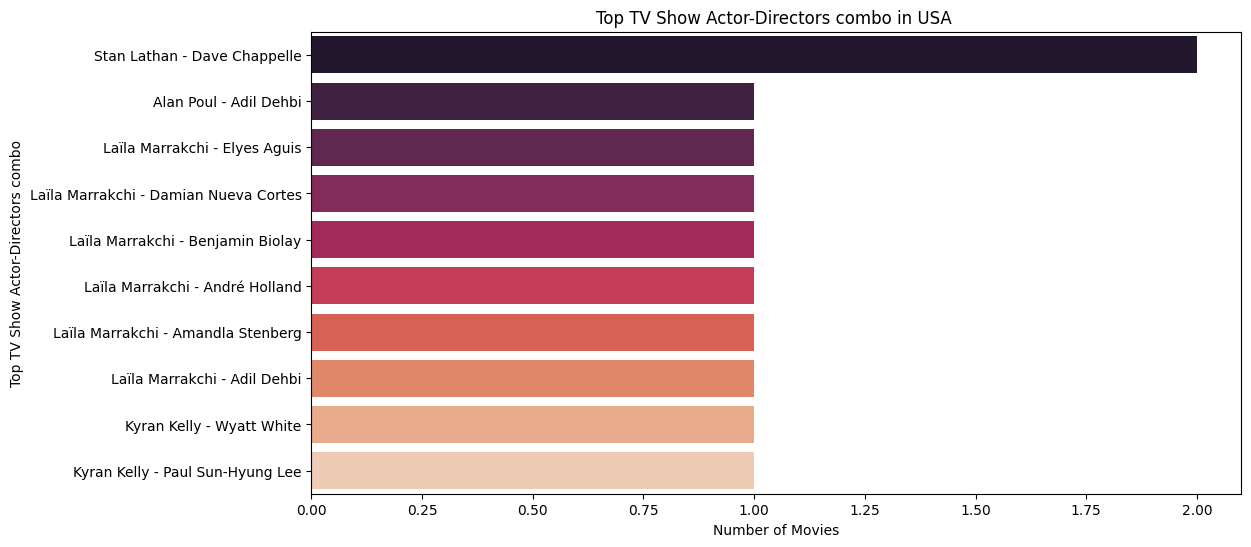

In [ ]:
usa_actor_director=usa_show[(usa_show['Directors']!="nan")&(usa_show['Actors']!="nan")]


usa_actor_director_show=usa_actor_director.groupby(['Directors','Actors'])['title'].nunique().sort_values(ascending=False).reset_index()[:10]
usa_actor_director_show['Director_Actor'] = usa_actor_director_show['Directors'] + ' - ' + usa_actor_director_show['Actors']


plt.figure(figsize=(12, 6))
sns.barplot(data=usa_actor_director_show,y='Director_Actor',x='title',hue='Director_Actor',palette="rocket")
plt.title("Top TV Show Actor-Directors combo in USA ")
plt.ylabel("Top TV Show Actor-Directors combo")
plt.xlabel("Number of Movies")

plt.show()

In [ ]:
usa_show_type=usa_show.groupby(['Genre'])[('title')].nunique().sort_values(ascending=False).reset_index()
usa_show_type.head(10)

,Genre,title
0,Crime TV Shows,10
1,TV Dramas,10
2,TV Comedies,10
3,TV Action & Adventure,9
4,International TV Shows,8
5,Docuseries,7
6,Stand-Up Comedy & Talk Shows,7
7,Kids' TV,5
8,TV Sci-Fi & Fantasy,3
9,British TV Shows,2


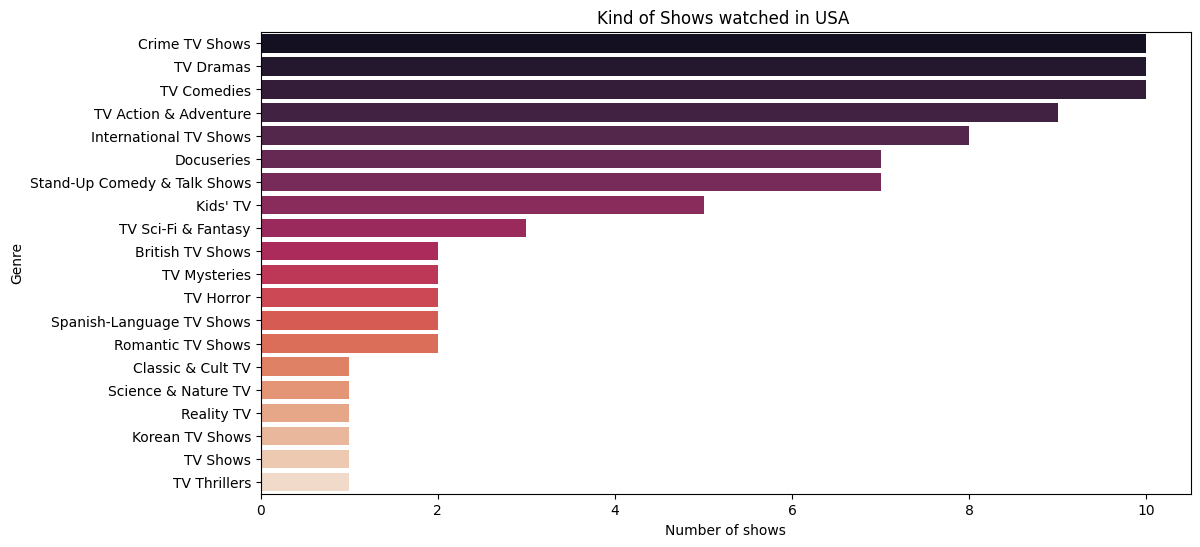

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=usa_show_type,y='Genre',x='title',hue='Genre',palette="rocket")
plt.title("Kind of Shows watched in USA ")
plt.ylabel("Genre")
plt.xlabel("Number of shows")

plt.show()

In [ ]:
usa_show_season=usa_show.groupby(['duration'])['title'].nunique().sort_values(ascending=False).reset_index()
usa_show_season

,duration,title
0,1,25
1,2,5
2,5,4
3,8,2
4,3,1
5,4,1
6,6,1
7,7,1
8,15,1


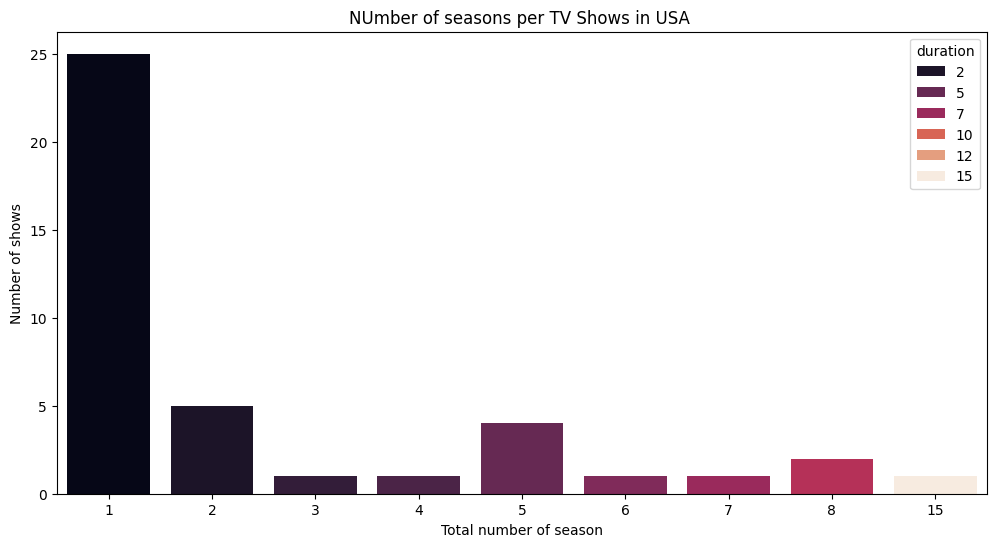

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=usa_show_season,x='duration',y='title',hue='duration',palette="rocket")
plt.title("NUmber of seasons per TV Shows in USA ")
plt.xlabel("Total number of season")
plt.ylabel("Number of shows")

plt.show()

TV shows with only one season has more number of shows , compared to other shows with more than one season. It is best suitable for binge watching.

#Release over the Years

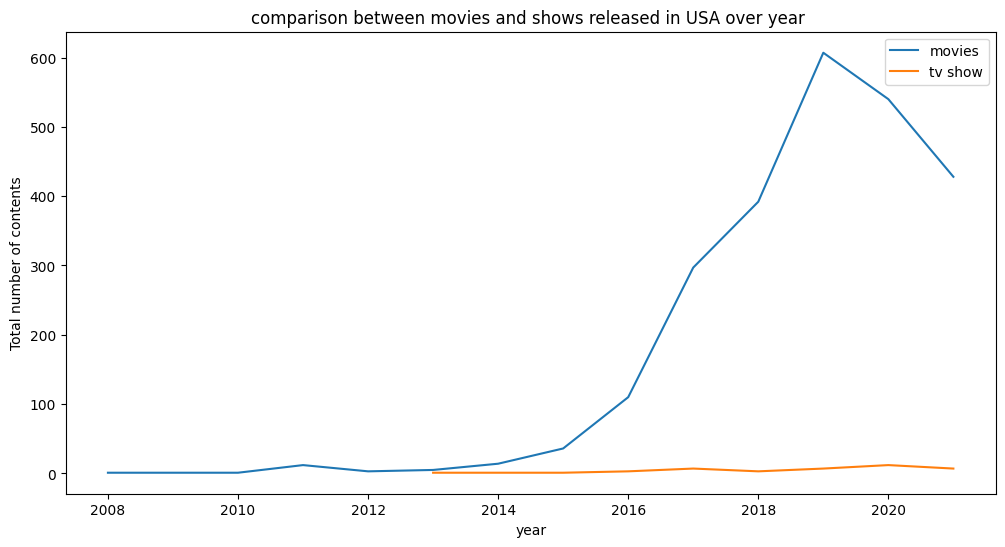

In [ ]:
usa_movie_year=usa_movie.groupby(['year_added'])['title'].nunique().sort_values().reset_index()
usa_show_year=usa_show.groupby(['year_added'])['title'].nunique().sort_values().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=usa_movie_year,x='year_added',y='title',label='movies')
sns.lineplot(data=usa_show_year,x='year_added',y='title',label='tv show')
plt.title("comparison between movies and shows released in USA over year ")
plt.ylabel("Total number of contents")
plt.xlabel("year")

plt.show()

##Recommendations



1.   The ideal movie length should be between 90-150 mins, which sharp and crisp content. So focusing on movies that fit in this length is more advisable.
2.   The less number of seasons for each show has an advantage that it reaches larger audience. The less number of shows helps in easy binge watching.
3.   The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.
4.   Apart from USA, the other countries has lesser number of TV shows, so we can add more number of shows for top coumtries like India, UK, Spain.
5.   In japan it seems that movies are less than the TV shows, so we can add more movies related to Dramas, Anime contents.
6.   In recent years the number of tv shows released where significatly low then movies. we can focus on creatimg more shows based on kind of genres liked in different countries.
7.   While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.
8.   The March and Apirl has significantly increasing release because of summer vacation in India and last 3 months of the year has comparatively more number of movie releases in India around festival seasons.Focusing o this period will reach the larger audience.
9.  The most of contents available for audience abouve age 14 and mature audience. Producing contents for them is mostly likable.










